In [231]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

Problem 1 - Define the problem and perform exploratory Data Analysis
- Problem definition - Check shape, Data types, statistical summary - Univariate analysis - Multivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

The comp-activ database comprises activity measures of computer systems. Data was gathered from a Sun Sparcstation 20/712 with 128 Mbytes of memory, operating in a multi-user university department. Users engaged in diverse tasks, such as internet access, file editing, and CPU-intensive programs.

Being an aspiring data scientist, you aim to establish a linear equation for predicting 'usr' (the percentage of time CPUs operate in user mode). Your goal is to analyze various system attributes to understand their influence on the system's 'usr' mode

In [232]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [233]:
path_excel = "/content/drive/My Drive/Module_5_Predictive_Modelling_Week_5_Project/compactiv.xlsx"
df = pd.read_excel(path_excel)
df

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.20,40671.0,53995.0,0.00,...,0.00,0.0,1.60,2.60,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.20,448.0,8385.0,0.00,...,0.00,0.0,0.00,0.00,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.40,NaN,31950.0,0.00,...,0.00,1.2,6.00,9.40,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.20,NaN,8670.0,0.00,...,0.00,0.0,0.20,0.20,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.40,NaN,12185.0,0.00,...,0.00,0.0,1.00,1.20,37.80,47.60,Not_CPU_Bound,633,1760253,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,16,12,3009,360,244,1.6,5.81,405250.0,85282.0,8.02,...,55.11,0.6,35.87,47.90,139.28,270.74,CPU_Bound,387,986647,80
8188,4,0,1596,170,146,2.4,1.80,89489.0,41764.0,3.80,...,0.20,0.8,3.80,4.40,122.40,212.60,Not_CPU_Bound,263,1055742,90
8189,16,5,3116,289,190,0.6,0.60,325948.0,52640.0,0.40,...,0.00,0.4,28.40,45.20,60.20,219.80,Not_CPU_Bound,400,969106,87
8190,32,45,5180,254,179,1.2,1.20,62571.0,29505.0,1.40,...,18.04,0.4,23.05,24.25,93.19,202.81,CPU_Bound,141,1022458,83


In [234]:
df.shape

(8192, 22)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [236]:
df.describe()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr
count,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8.088000e+03,8.177000e+03,8192.000000,...,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8.192000e+03,8192.000000
mean,19.559692,13.106201,2306.318237,210.479980,150.058228,1.884554,2.791998,1.973857e+05,9.590299e+04,2.285317,...,11.919712,21.526849,1.127505,8.277960,12.388586,109.793799,185.315796,1763.456299,1.328126e+06,83.968872
std,53.353799,29.891726,1633.617322,198.980146,160.478980,2.479493,5.212456,2.398375e+05,1.408417e+05,5.307038,...,32.363520,71.141340,5.708347,13.874978,22.281318,114.419221,191.000603,2482.104511,4.220194e+05,18.401905
min,0.000000,0.000000,109.000000,6.000000,7.000000,0.000000,0.000000,2.780000e+02,1.498000e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,55.000000,2.000000e+00,0.000000
25%,2.000000,0.000000,1012.000000,86.000000,63.000000,0.400000,0.200000,3.409150e+04,2.291600e+04,0.000000,...,0.000000,0.000000,0.000000,0.600000,0.600000,25.000000,45.400000,231.000000,1.042624e+06,81.000000
50%,7.000000,1.000000,2051.500000,166.000000,117.000000,0.800000,1.200000,1.254735e+05,4.661900e+04,0.000000,...,0.000000,0.000000,0.000000,2.800000,3.800000,63.800000,120.400000,579.000000,1.289290e+06,89.000000
75%,20.000000,10.000000,3317.250000,279.000000,185.000000,2.200000,2.800000,2.678288e+05,1.061010e+05,2.400000,...,5.000000,0.000000,0.600000,9.765000,13.800000,159.600000,251.800000,2002.250000,1.730380e+06,94.000000
max,1845.000000,575.000000,12493.000000,5318.000000,5456.000000,20.120000,59.560000,2.526649e+06,1.801623e+06,81.440000,...,523.000000,1237.000000,211.580000,141.200000,292.610000,899.800000,1365.000000,12027.000000,2.243187e+06,99.000000


Problem 1 - Data Pre-processing
Prepare the data for modelling: - Missing Value Treatment (if needed) - Outlier Detection (treat, if needed) - Feature Engineering - Encode the data - Train-test split

In [237]:
df.dtypes == 'object'

lread       False
lwrite      False
scall       False
sread       False
swrite      False
fork        False
exec        False
rchar       False
wchar       False
pgout       False
ppgout      False
pgfree      False
pgscan      False
atch        False
pgin        False
ppgin       False
pflt        False
vflt        False
runqsz       True
freemem     False
freeswap    False
usr         False
dtype: bool

In [238]:
df = pd.get_dummies(df, columns=['runqsz'],drop_first=True)

In [239]:
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,4670,1730946,95,0
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,7278,1869002,97,1
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,702,1021237,87,1
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,7248,1863704,98,1
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,633,1760253,90,1


In [240]:
df.isnull().sum()

lread                     0
lwrite                    0
scall                     0
sread                     0
swrite                    0
fork                      0
exec                      0
rchar                   104
wchar                    15
pgout                     0
ppgout                    0
pgfree                    0
pgscan                    0
atch                      0
pgin                      0
ppgin                     0
pflt                      0
vflt                      0
freemem                   0
freeswap                  0
usr                       0
runqsz_Not_CPU_Bound      0
dtype: int64

In [241]:
for column in df.columns:
  if df[column].dtypes !='object':
    mean = df[column].mean()
    df[column] = df[column].fillna(mean)

In [242]:
df.isnull().sum()

lread                   0
lwrite                  0
scall                   0
sread                   0
swrite                  0
fork                    0
exec                    0
rchar                   0
wchar                   0
pgout                   0
ppgout                  0
pgfree                  0
pgscan                  0
atch                    0
pgin                    0
ppgin                   0
pflt                    0
vflt                    0
freemem                 0
freeswap                0
usr                     0
runqsz_Not_CPU_Bound    0
dtype: int64

In [243]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lread                 8192 non-null   int64  
 1   lwrite                8192 non-null   int64  
 2   scall                 8192 non-null   int64  
 3   sread                 8192 non-null   int64  
 4   swrite                8192 non-null   int64  
 5   fork                  8192 non-null   float64
 6   exec                  8192 non-null   float64
 7   rchar                 8192 non-null   float64
 8   wchar                 8192 non-null   float64
 9   pgout                 8192 non-null   float64
 10  ppgout                8192 non-null   float64
 11  pgfree                8192 non-null   float64
 12  pgscan                8192 non-null   float64
 13  atch                  8192 non-null   float64
 14  pgin                  8192 non-null   float64
 15  ppgin                

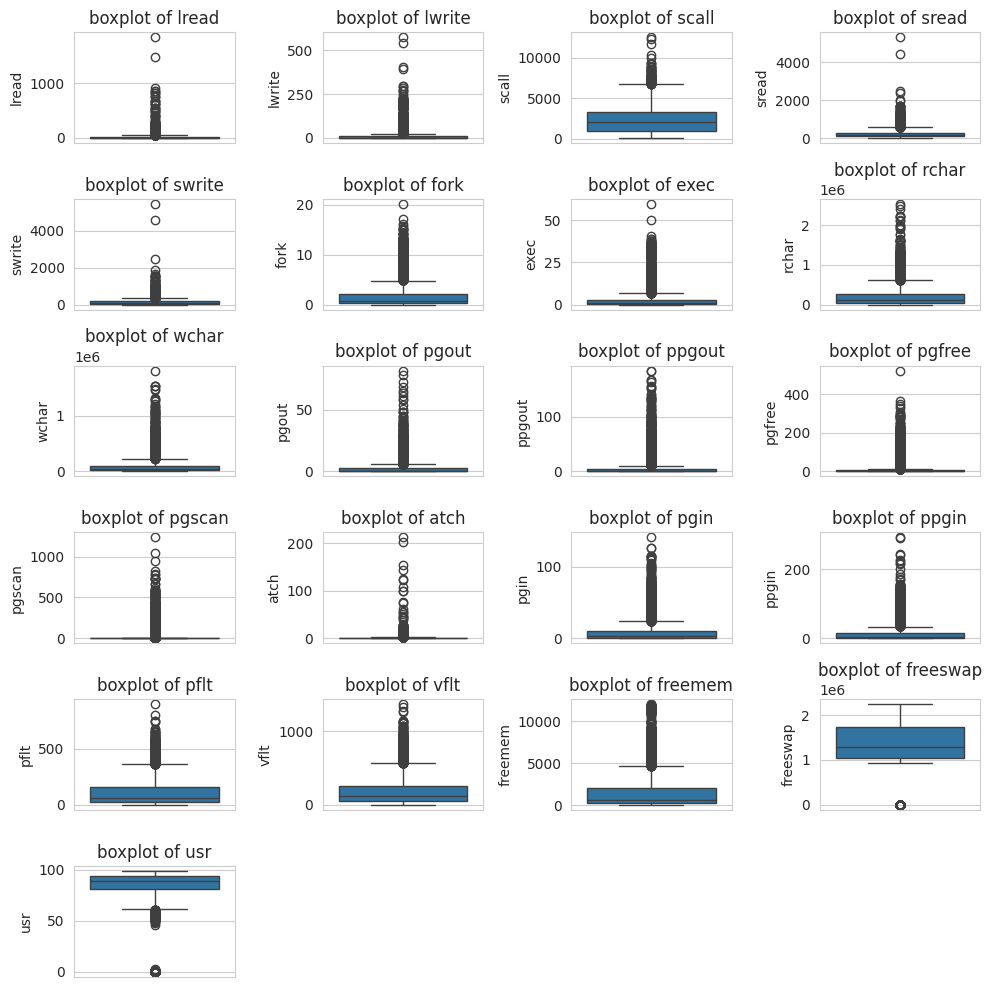

In [245]:
plt.figure(figsize= (10,10))
numericals = df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
for i in range(len(numericals)):
  plt.subplot(6,4,i+1)
  sns.boxplot(data = df, y = df[numericals[i]])
  plt.title('boxplot of {}'.format(numericals[i]))
  plt.tight_layout()

In [246]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [247]:
for column in df[numericals].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

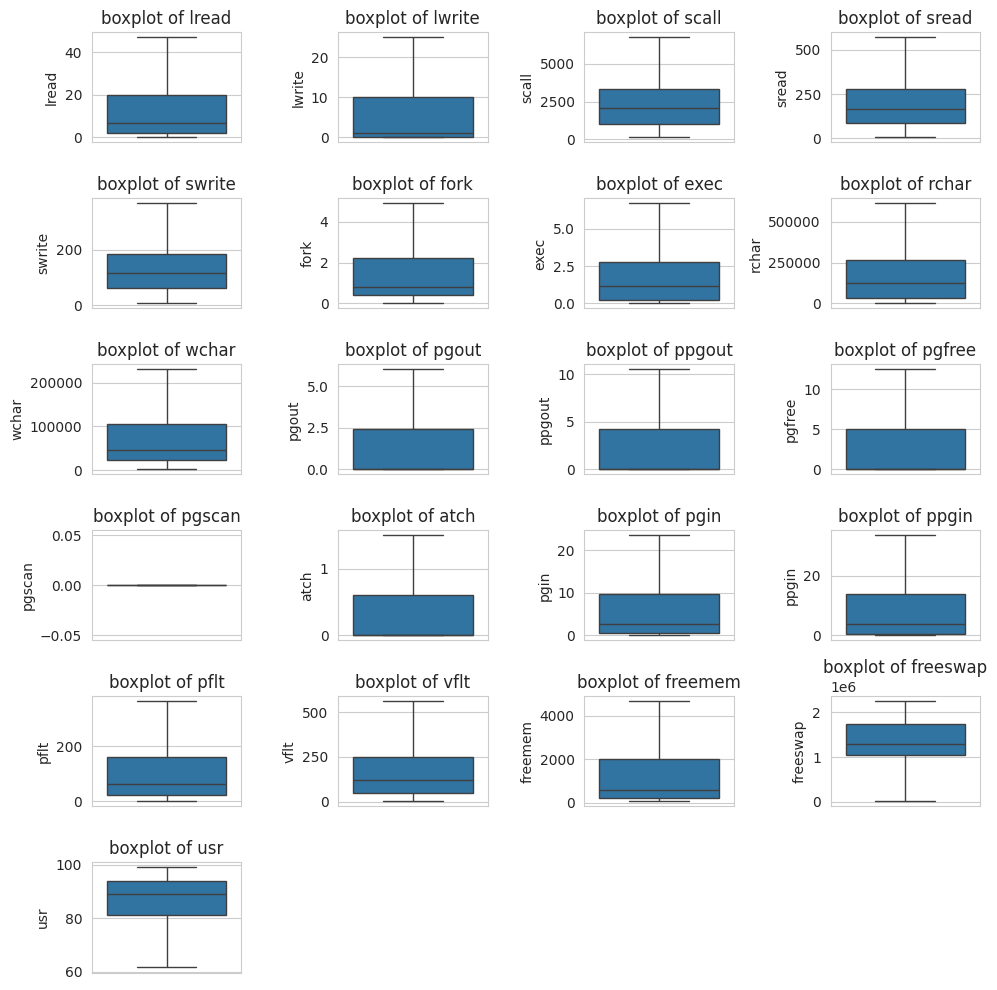

In [248]:
plt.figure(figsize= (10,10))
numericals = df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
for i in range(len(numericals)):
  plt.subplot(6,4,i+1)
  sns.boxplot(data = df, y = df[numericals[i]])
  plt.title('boxplot of {}'.format(numericals[i]))
  plt.tight_layout()

In [ ]:
df_attr = (df[numericals])
sns.pairplot(df_attr, diag_kind='kde')
plt.show()

In [249]:
df.describe()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound
count,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,...,8192.0,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8.192000e+03,8192.000000,8192.000000
mean,13.422852,6.657471,2294.483582,199.776367,137.969971,1.557771,1.931495,179797.020981,75735.782564,1.420901,...,0.0,0.388279,6.385262,9.140437,105.636071,175.622458,1387.624527,1.328520e+06,86.246216,0.528687
std,15.159741,9.291945,1593.093446,146.758932,97.141835,1.591220,2.028253,174495.517891,71257.347749,2.200251,...,0.0,0.562937,7.684420,11.160927,101.548788,162.497031,1605.763418,4.207827e+05,9.748585,0.499207
min,0.000000,0.000000,109.000000,6.000000,7.000000,0.000000,0.000000,278.000000,1498.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,55.000000,1.098950e+04,61.500000,0.000000
25%,2.000000,0.000000,1012.000000,86.000000,63.000000,0.400000,0.200000,34860.500000,22977.750000,0.000000,...,0.0,0.000000,0.600000,0.600000,25.000000,45.400000,231.000000,1.042624e+06,81.000000,0.000000
50%,7.000000,1.000000,2051.500000,166.000000,117.000000,0.800000,1.200000,127825.000000,46653.000000,0.000000,...,0.0,0.000000,2.800000,3.800000,63.800000,120.400000,579.000000,1.289290e+06,89.000000,1.000000
75%,20.000000,10.000000,3317.250000,279.000000,185.000000,2.200000,2.800000,265394.750000,106037.000000,2.400000,...,0.0,0.600000,9.765000,13.800000,159.600000,251.800000,2002.250000,1.730380e+06,94.000000,1.000000
max,47.000000,25.000000,6775.125000,568.500000,368.000000,4.900000,6.700000,611196.125000,230625.875000,6.000000,...,0.0,1.500000,23.512500,33.600000,361.500000,561.400000,4659.125000,2.243187e+06,99.000000,1.000000


In [250]:
df_attr = (df[numericals])
sns.pairplot(df_attr, diag_kind='kde')
plt.show()

Bi-variate analysis with respect to USR variable.

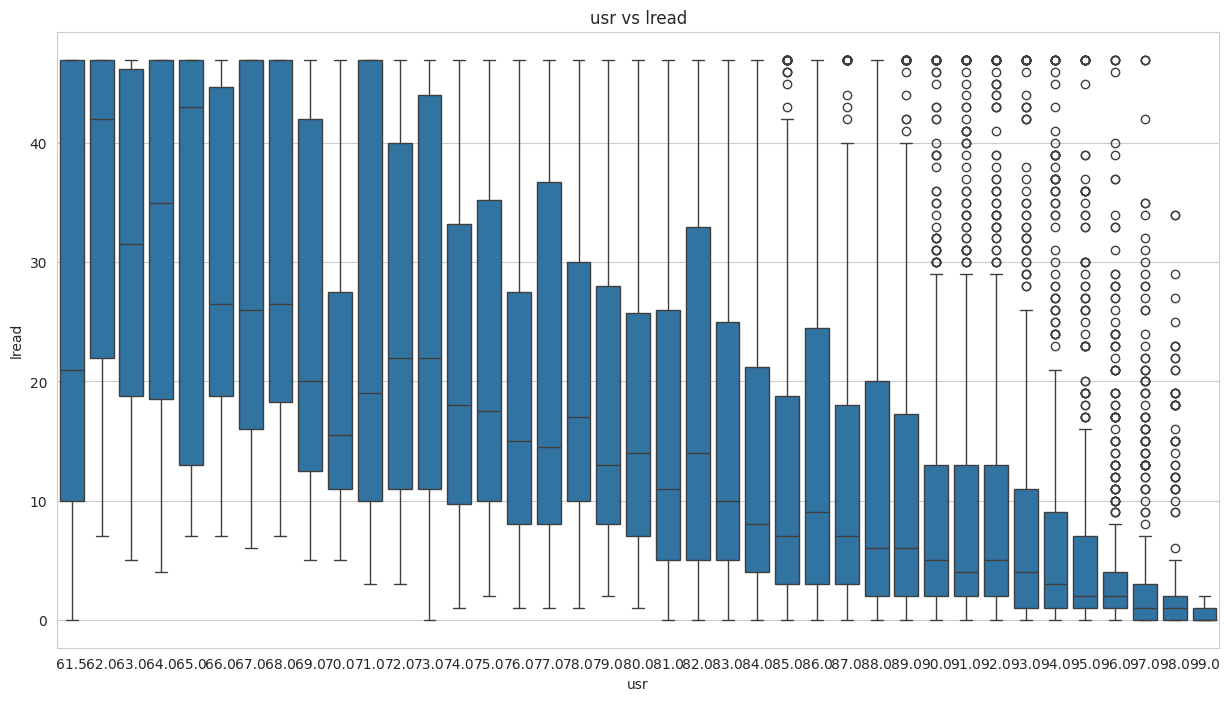

In [251]:
plt.title('usr vs lread')
sns.boxplot(x=df['usr'],y=df['lread']);

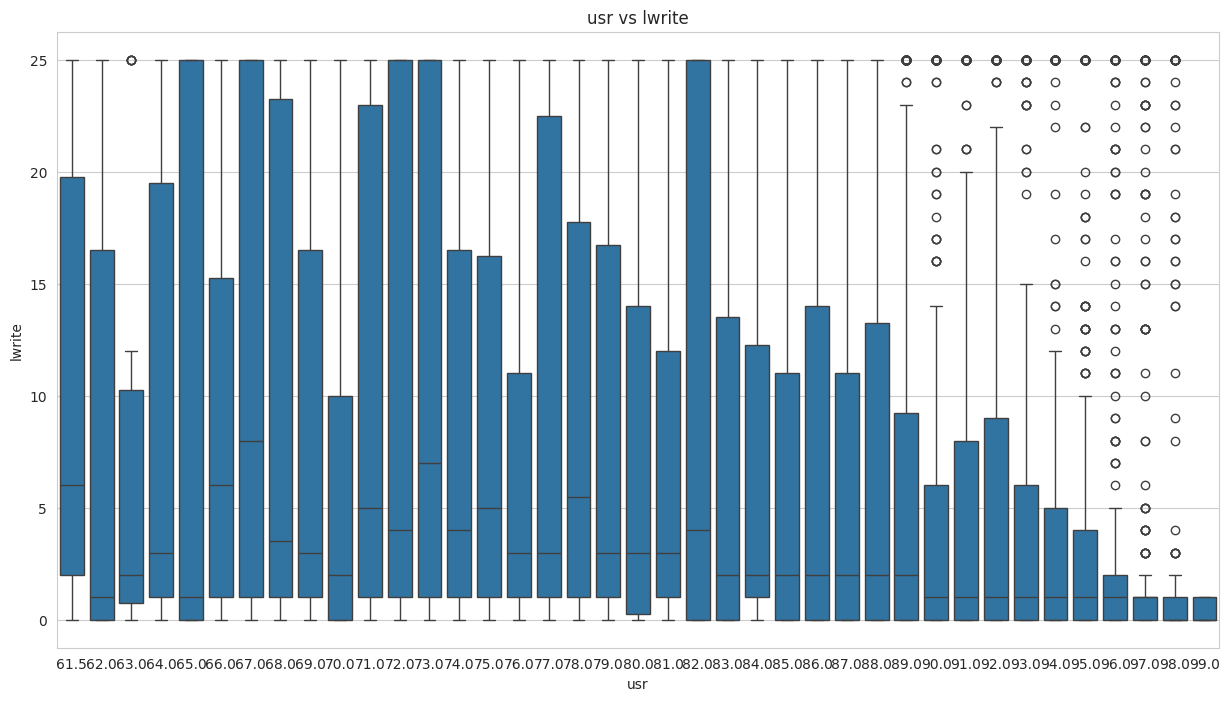

In [252]:
plt.title('usr vs lwrite')
sns.boxplot(x=df['usr'],y=df['lwrite']);

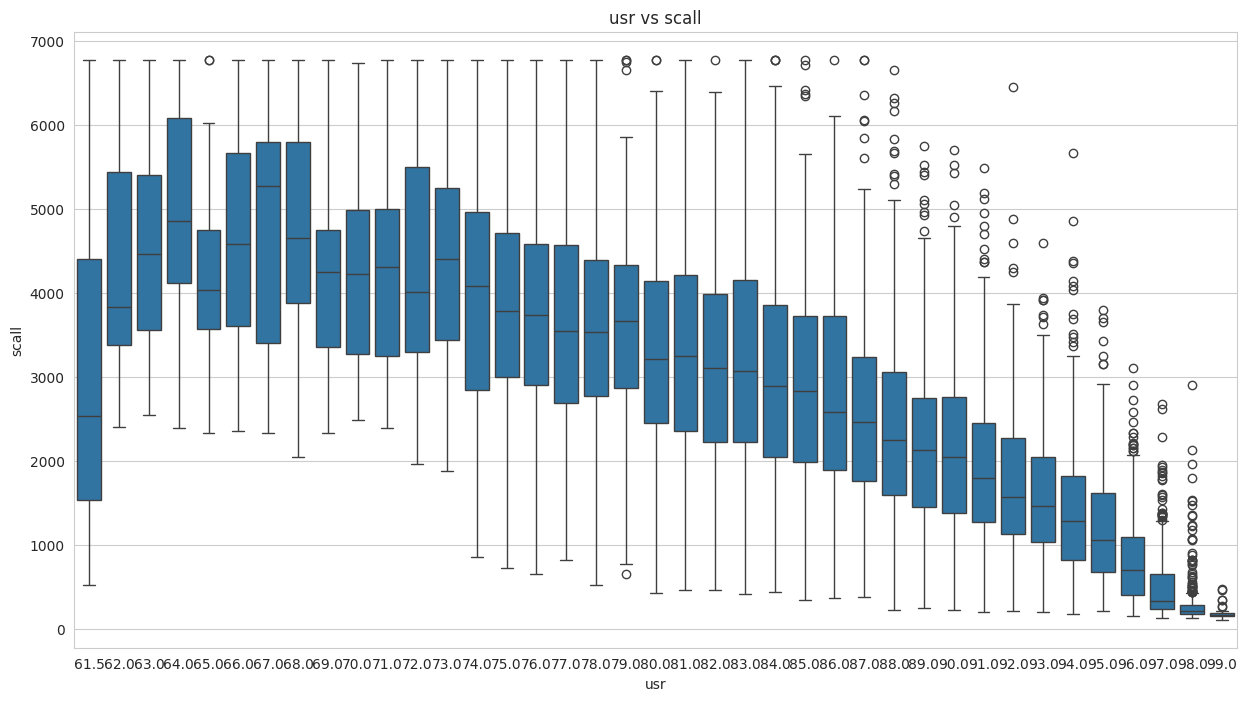

In [253]:
plt.title('usr vs scall')
sns.boxplot(x=df['usr'],y=df['scall']);

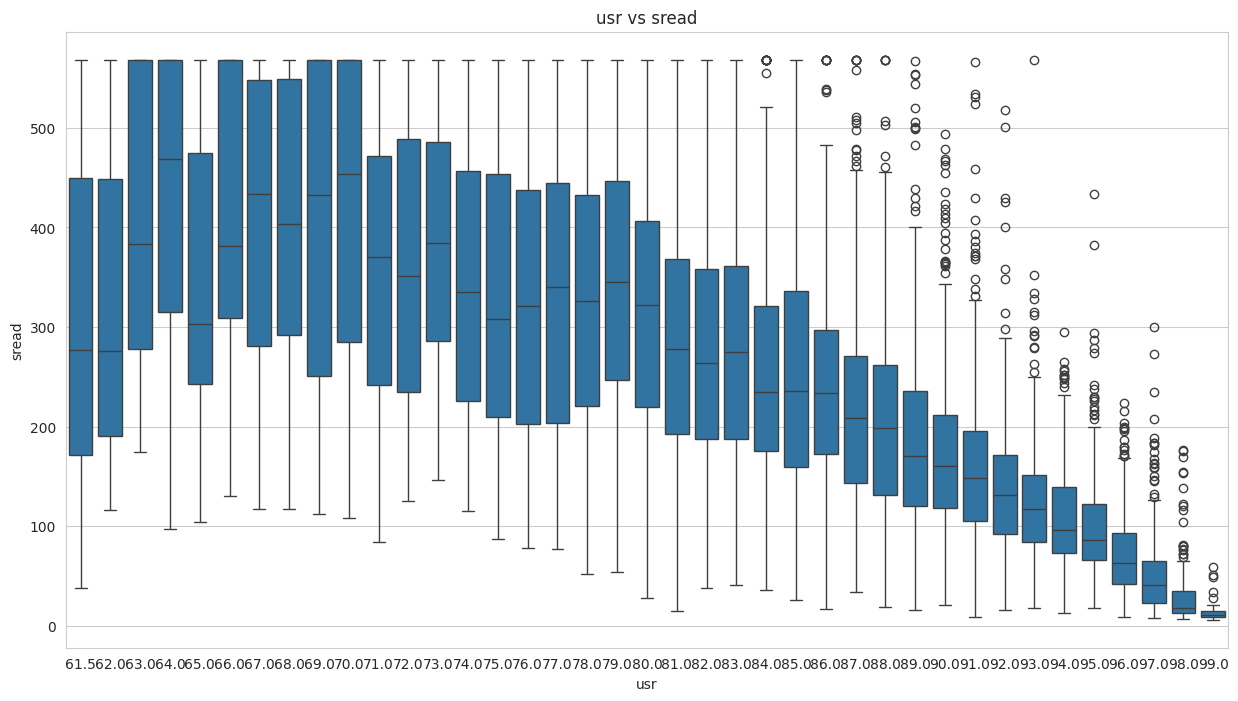

In [254]:
plt.title('usr vs sread')
sns.boxplot(x=df['usr'],y=df['sread']);

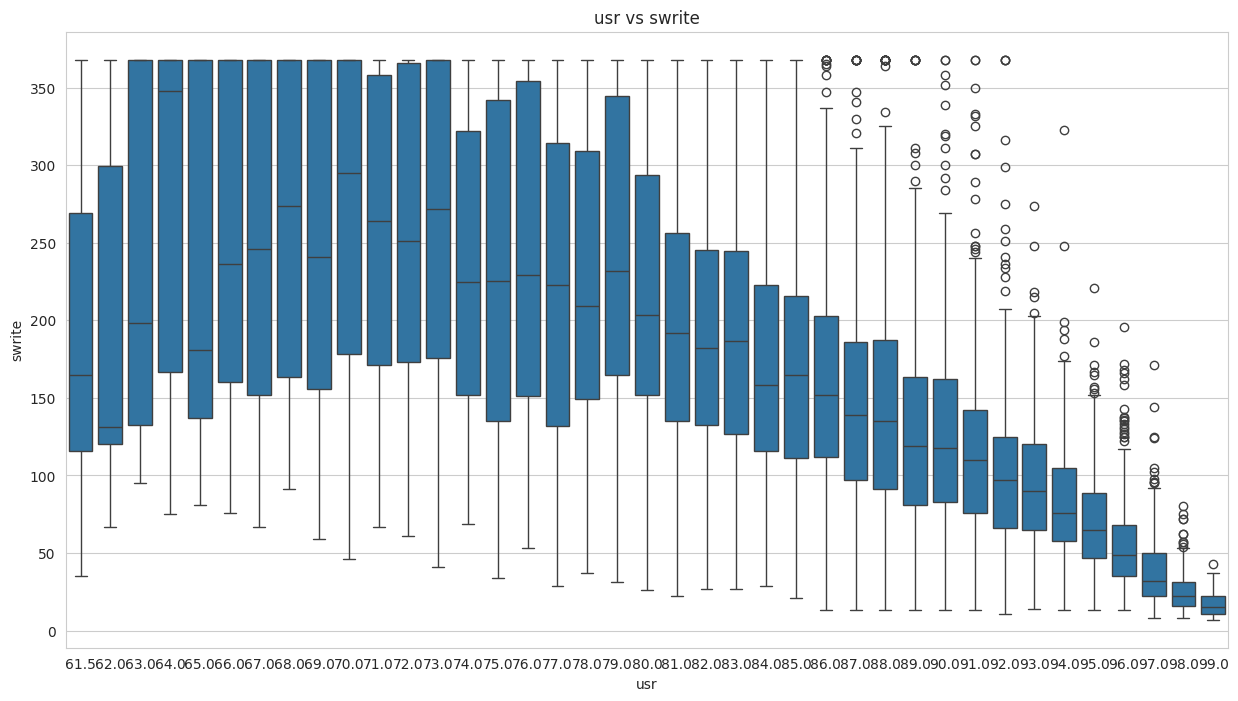

In [255]:
plt.title('usr vs swrite')
sns.boxplot(x=df['usr'],y=df['swrite']);

In [256]:
#ds = df[['lread','scall','exec','rchar','wchar','pgfree','atch','pgin','pflt','freemem','freeswap','usr']]
#sns.pairplot(ds)

Train-Test Split

In [257]:
X = df.drop('usr', axis=1)
y = df[['usr']]

In [258]:
X.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound
0,1.0,0.0,2147.0,79.0,68.0,0.2,0.2,40671.000000,53995.0,0.0,...,0.0,0.0,0.0,1.6,2.6,16.00,26.40,4659.125,1730946.0,0
1,0.0,0.0,170.0,18.0,21.0,0.2,0.2,448.000000,8385.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15.63,16.83,4659.125,1869002.0,1
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,197385.728363,31950.0,0.0,...,0.0,0.0,1.2,6.0,9.4,150.20,220.20,702.000,1021237.0,1
3,0.0,0.0,160.0,12.0,16.0,0.2,0.2,197385.728363,8670.0,0.0,...,0.0,0.0,0.0,0.2,0.2,15.60,16.80,4659.125,1863704.0,1
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,197385.728363,12185.0,0.0,...,0.0,0.0,0.0,1.0,1.2,37.80,47.60,633.000,1760253.0,1


In [259]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [260]:
X_train.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound
694,1.0,1.0,1345.0,223.0,192.0,0.6,0.6,198703.0,230625.875,0.60,...,12.50,0.0,1.5,3.80,7.40,28.20,56.60,121.0,1375446.0,0
5535,1.0,1.0,1429.0,87.0,67.0,0.2,0.2,7163.0,24842.000,0.00,...,0.00,0.0,0.0,1.60,1.60,15.77,30.74,1476.0,1021541.0,1
4244,47.0,25.0,3273.0,225.0,180.0,0.6,0.4,83246.0,53705.000,5.39,...,7.19,0.0,1.5,3.99,4.59,59.88,74.05,82.0,10989.5,0
2472,13.0,8.0,4349.0,300.0,191.0,2.8,3.0,96009.0,70467.000,0.00,...,0.00,0.0,0.0,2.80,3.20,129.00,236.80,772.0,993909.0,0
7052,17.0,23.0,225.0,13.0,13.0,0.4,1.6,17132.0,12514.000,0.00,...,0.00,0.0,0.0,0.00,0.00,19.80,23.80,4179.0,1821682.0,1


In [261]:
X_train.value_counts().sum()

5734

In [262]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (5734, 21)
Number of rows and columns of the training set for the dependent variable: (5734, 1)
Number of rows and columns of the test set for the independent variables: (2458, 21)
Number of rows and columns of the test set for the dependent variable: (2458, 1)


In [263]:
import statsmodels.api as sm

In [264]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [265]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1116.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:44:21   Log-Likelihood:                -16656.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5713   BIC:                         3.349e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1314 

In [266]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                   29.239441
lread                    5.350218
lwrite                   4.328116
scall                    2.960756
sread                    6.415575
swrite                   5.594100
fork                    13.035282
exec                     3.241124
rchar                    2.129470
wchar                    1.583532
pgout                   11.359771
ppgout                  29.404123
pgfree                  16.497072
pgscan                        NaN
atch                     1.876238
pgin                    13.809962
ppgin                   13.951564
pflt                    12.001532
vflt                    15.968862
freemem                  1.961657
freeswap                 1.841358
runqsz_Not_CPU_Bound     1.157096
dtype: float64



/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [267]:
X_train1 = X_train.drop(["ppgout"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train1)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [268]:
X_train = X_train.drop(["ppgout"], axis=1)
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:44:21   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5714   BIC:                         3.349e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1580 

In [269]:
vif_series1 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series1))

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF values: 

const                   29.032870
lread                    5.350047
lwrite                   4.328043
scall                    2.960539
sread                    6.415504
swrite                   5.594015
fork                    13.027207
exec                     3.238925
rchar                    2.129451
wchar                    1.579945
pgout                    6.454277
pgfree                   6.172906
pgscan                        NaN
atch                     1.875900
pgin                    13.784432
ppgin                   13.898089
pflt                    12.001532
vflt                    15.964611
freemem                  1.959604
freeswap                 1.838299
runqsz_Not_CPU_Bound     1.156712
dtype: float64



In [270]:
X_train2 = X_train.drop(["pgscan"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train2)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [271]:
X_train = X_train.drop(["pgscan"], axis=1)
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:44:21   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5714   BIC:                         3.349e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1580 

In [272]:
vif_series2 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                   29.032870
lread                    5.350047
lwrite                   4.328043
scall                    2.960539
sread                    6.415504
swrite                   5.594015
fork                    13.027207
exec                     3.238925
rchar                    2.129451
wchar                    1.579945
pgout                    6.454277
pgfree                   6.172906
atch                     1.875900
pgin                    13.784432
ppgin                   13.898089
pflt                    12.001532
vflt                    15.964611
freemem                  1.959604
freeswap                 1.838299
runqsz_Not_CPU_Bound     1.156712
dtype: float64



In [273]:
X_train3 = X_train.drop(["vflt"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train3)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [274]:
X_train = X_train.drop(["vflt"], axis=1)
model3 = sm.OLS(y_train,X_train).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1236.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:44:22   Log-Likelihood:                -16664.
No. Observations:                5734   AIC:                         3.337e+04
Df Residuals:                    5715   BIC:                         3.349e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0194 

In [275]:
vif_series3 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                   28.653594
lread                    5.335051
lwrite                   4.326838
scall                    2.953114
sread                    6.369489
swrite                   5.592704
fork                    10.089022
exec                     3.235111
rchar                    2.119944
wchar                    1.558137
pgout                    6.451027
pgfree                   6.149320
atch                     1.864582
pgin                    13.602664
ppgin                   13.898088
pflt                     9.132270
freemem                  1.958294
freeswap                 1.787867
runqsz_Not_CPU_Bound     1.156656
dtype: float64



In [276]:
X_train4 = X_train.drop(["ppgin"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train4)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.795


In [277]:
X_train = X_train.drop(["ppgin"], axis=1)
model4 = sm.OLS(y_train,X_train).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1305.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:44:22   Log-Likelihood:                -16670.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5716   BIC:                         3.350e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0638 

In [278]:
vif_series4 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const                   28.605874
lread                    5.303607
lwrite                   4.316085
scall                    2.951995
sread                    6.369370
swrite                   5.592604
fork                    10.074242
exec                     3.235101
rchar                    2.086720
wchar                    1.558135
pgout                    6.445748
pgfree                   6.093664
atch                     1.863857
pgin                     1.528544
pflt                     9.132014
freemem                  1.958045
freeswap                 1.785549
runqsz_Not_CPU_Bound     1.156279
dtype: float64



In [279]:
X_train5 = X_train.drop(["fork"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train5)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.794


In [280]:
X_train = X_train.drop(["fork"], axis=1)
model5 = sm.OLS(y_train,X_train).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1386.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:44:22   Log-Likelihood:                -16672.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5717   BIC:                         3.349e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1020 

In [281]:
vif_series5 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series5))

VIF values: 

const                   28.451104
lread                    5.284610
lwrite                   4.297702
scall                    2.915030
sread                    6.368307
swrite                   5.387667
exec                     2.856843
rchar                    2.085730
wchar                    1.550007
pgout                    6.445647
pgfree                   6.093084
atch                     1.862878
pgin                     1.526215
pflt                     3.458170
freemem                  1.957555
freeswap                 1.782981
runqsz_Not_CPU_Bound     1.155738
dtype: float64



In [282]:
X_train6 = X_train.drop(["pgout"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.793


In [283]:
X_train = X_train.drop(["pgout"], axis=1)
model6 = sm.OLS(y_train,X_train).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1467.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:44:22   Log-Likelihood:                -16690.
No. Observations:                5734   AIC:                         3.341e+04
Df Residuals:                    5718   BIC:                         3.352e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0795 

In [284]:
vif_series6 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series6))

VIF values: 

const                   28.447095
lread                    5.281926
lwrite                   4.296261
scall                    2.913282
sread                    6.367637
swrite                   5.385627
exec                     2.853935
rchar                    2.083926
wchar                    1.544617
pgfree                   1.920472
atch                     1.733813
pgin                     1.525380
pflt                     3.456038
freemem                  1.951433
freeswap                 1.782887
runqsz_Not_CPU_Bound     1.151691
dtype: float64



In [285]:
X_train7 = X_train.drop(["sread"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train7)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.793


In [286]:
X_train = X_train.drop(["sread"], axis=1)
model7 = sm.OLS(y_train,X_train).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1572.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:44:22   Log-Likelihood:                -16690.
No. Observations:                5734   AIC:                         3.341e+04
Df Residuals:                    5719   BIC:                         3.351e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0791 

In [287]:
vif_series7 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series7))

VIF values: 

const                   28.376593
lread                    5.274343
lwrite                   4.286878
scall                    2.654789
swrite                   3.012604
exec                     2.847014
rchar                    1.670256
wchar                    1.531737
pgfree                   1.918233
atch                     1.732757
pgin                     1.524455
pflt                     3.433871
freemem                  1.950916
freeswap                 1.769289
runqsz_Not_CPU_Bound     1.151687
dtype: float64



In [288]:
X_train8 = X_train.drop(["lwrite"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train8)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.793 
Adjusted R-squared: 0.793


In [289]:
X_train = X_train.drop(["lwrite"], axis=1)
model8 = sm.OLS(y_train,X_train).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1688.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:44:23   Log-Likelihood:                -16698.
No. Observations:                5734   AIC:                         3.342e+04
Df Residuals:                    5720   BIC:                         3.352e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1391 

In [290]:
vif_series8 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series8))

VIF values: 

const                   28.308015
lread                    1.294731
scall                    2.651658
swrite                   3.012373
exec                     2.834768
rchar                    1.669999
wchar                    1.523386
pgfree                   1.915543
atch                     1.732116
pgin                     1.497109
pflt                     3.299141
freemem                  1.950182
freeswap                 1.769279
runqsz_Not_CPU_Bound     1.145165
dtype: float64



In [291]:
X_train9 = X_train.drop(["swrite"], axis=1)
olsmod_9 = sm.OLS(y_train, X_train9)
olsres_9 = olsmod_9.fit()
print(
    "R-squared:",
    np.round(olsres_9.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_9.rsquared_adj, 3),
)

R-squared: 0.792 
Adjusted R-squared: 0.792


In [292]:
X_train = X_train.drop(["swrite"], axis=1)
model9 = sm.OLS(y_train,X_train).fit()
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1817.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:44:23   Log-Likelihood:                -16713.
No. Observations:                5734   AIC:                         3.345e+04
Df Residuals:                    5721   BIC:                         3.354e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.8774 

In [293]:
vif_series9 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,)
print("VIF values: \n\n{}\n".format(vif_series9))

VIF values: 

const                   27.635209
lread                    1.294498
scall                    1.738585
exec                     2.566335
rchar                    1.668777
wchar                    1.404570
pgfree                   1.915134
atch                     1.731178
pgin                     1.496788
pflt                     2.775249
freemem                  1.930244
freeswap                 1.761990
runqsz_Not_CPU_Bound     1.145164
dtype: float64



In [302]:
X_train10 = X_train.drop(["atch"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train10)
olsres_10 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)

R-squared: 0.792 
Adjusted R-squared: 0.791


In [295]:
X_train11 = X_train.drop(["runqsz_Not_CPU_Bound"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train11)
olsres_11 = olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

R-squared: 0.786 
Adjusted R-squared: 0.786


In [297]:
X_train12 = X_train.drop(["pflt"], axis=1)
olsmod_12 = sm.OLS(y_train, X_train12)
olsres_12 = olsmod_12.fit()
print(
    "R-squared:",
    np.round(olsres_12.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_12.rsquared_adj, 3),
)

R-squared: 0.72 
Adjusted R-squared: 0.719


In [ ]:
X_train13 = X_train.drop(["pflt"], axis=1)
olsmod_13 = sm.OLS(y_train, X_train13)
olsres_13 = olsmod_13.fit()
print(
    "R-squared:",
    np.round(olsres_13.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_13.rsquared_adj, 3),
)

In [298]:
X_train13 = X_train.drop(["pgin"], axis=1)
olsmod_13 = sm.OLS(y_train, X_train13)
olsres_13 = olsmod_13.fit()
print(
    "R-squared:",
    np.round(olsres_13.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_13.rsquared_adj, 3),
)

R-squared: 0.789 
Adjusted R-squared: 0.788


In [299]:
X_train14 = X_train.drop(["atch"], axis=1)
olsmod_14 = sm.OLS(y_train, X_train14)
olsres_14 = olsmod_14.fit()
print(
    "R-squared:",
    np.round(olsres_14.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_14.rsquared_adj, 3),
)

R-squared: 0.792 
Adjusted R-squared: 0.791


In [307]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = model9.fittedvalues.values  # predicted values
df_pred["Residuals"] = model9.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,91.0,89.783145,1.216855
1,94.0,91.667758,2.332242
2,61.5,75.242949,-13.742949
3,83.0,80.608408,2.391592
4,94.0,97.776152,-3.776152


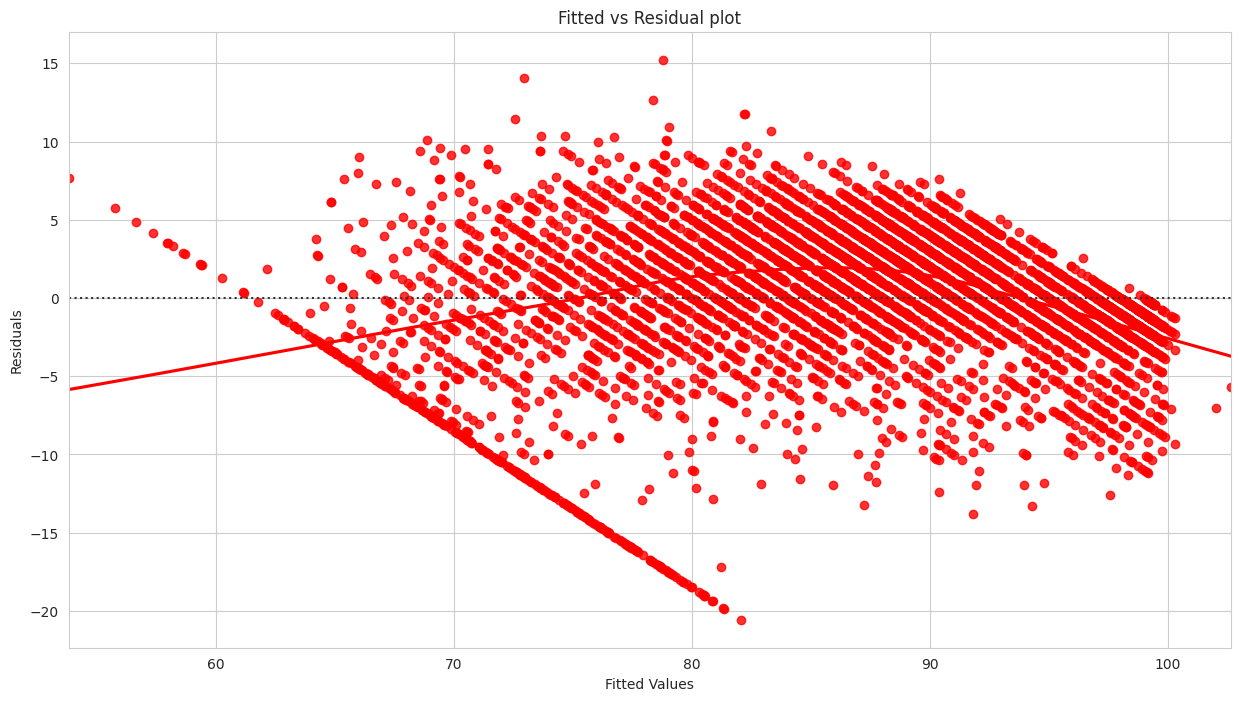

In [308]:
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="red", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [66]:
X_train9.columns

Index(['const', 'lread', 'scall', 'exec', 'rchar', 'wchar', 'pgfree', 'atch',
       'pgin', 'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [67]:
sns.pairplot(df[['lread', 'scall', 'exec', 'rchar', 'wchar', 'pgfree', 'atch',
       'pgin', 'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Test for Normality

In [68]:
from scipy import stats


In [69]:
stats.shapiro(df_pred["Residuals"])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9460248351097107, pvalue=1.4118082028072532e-41)

Since p-value < 0.05, the residuals are not normal as per shapiro test.

Test for Homoscedasticity

In [70]:
import statsmodels.stats.api as sms

In [71]:
sms.het_goldfeldquandt(df_pred["Residuals"], X_train9)[1]

0.001838119130088917

Since p-value < 0.05 we can say that the residuals are heterocedastic.

All the assumptions of linear regression are now satisfied. Let's check the summary of our final model (olsres_11).

In [72]:
print(olsres_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1817.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:38:35   Log-Likelihood:                -16713.
No. Observations:                5734   AIC:                         3.345e+04
Df Residuals:                    5721   BIC:                         3.354e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.8774 

Observations:

In [312]:
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train9.columns)):
    if i == 0:
        print(olsres_9.params[i], "+", end=" ")
    elif i != len(X_train9.columns) - 1:
        print(
            olsres_9.params[i],
            "* (",
            X_train9.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_9.params[i], "* (", X_train9.columns[i],")")

usr = 83.8774079087391 + -0.03733764893363256 * ( lread ) +  -0.0008691366131258655 * ( scall ) +  -0.2800847411623385 * ( exec ) +  -5.567103466313801e-06 * ( rchar ) +  -6.417313704172158e-06 * ( wchar ) +  -0.11946055192197408 * ( pgfree ) +  0.4044809394998686 * ( atch ) +  -0.09037964728521161 * ( pgin ) +  -0.04285843847523042 * ( pflt ) +  -0.0004186649762077256 * ( freemem ) +  8.982946213383948e-06 * ( freeswap ) +  1.5869840352089328 * ( runqsz_Not_CPU_Bound )


Predictions:

In [74]:
X_train9.columns

Index(['const', 'lread', 'scall', 'exec', 'rchar', 'wchar', 'pgfree', 'atch',
       'pgin', 'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [75]:
X_test.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin',
       'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [76]:
X_test2 = X_test.drop(
    ['lwrite','sread', 'swrite', 'fork','pgout', 'ppgout','pgscan','ppgin','vflt',], axis=1
)

In [77]:
y_pred_test = olsres_9.predict(X_test2)
y_pred_train = olsres_9.predict(X_train9)

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [79]:
rmse1 = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse1

4.46245208502042

In [80]:
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse2

4.702493945790478

### Linear Regression using (sklearn)

In [81]:
regression_model = LinearRegression()
regression_model.fit(X_train9, y_train)

LinearRegression()

In [228]:
X_train9.columns

Index(['const', 'lread', 'scall', 'exec', 'rchar', 'wchar', 'pgfree', 'atch',
       'pgin', 'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [309]:
for idx, col_name in enumerate(X_train9.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for const is 0.0
The coefficient for lread is -0.03733764893369174
The coefficient for scall is -0.0008691366131237162
The coefficient for exec is -0.28008474116360965
The coefficient for rchar is -5.567103466217957e-06
The coefficient for wchar is -6.417313704300265e-06
The coefficient for pgfree is -0.11946055192187052
The coefficient for atch is 0.4044809394998323
The coefficient for pgin is -0.0903796472852094
The coefficient for pflt is -0.04285843847523408
The coefficient for freemem is -0.00041866497620845946
The coefficient for freeswap is 8.982946213351856e-06
The coefficient for runqsz_Not_CPU_Bound is 1.5869840352088447


In [82]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 83.87740790872257


In [83]:
regression_model.score(X_train9, y_train)

0.7921296016611635

In [84]:
regression_model.score(X_test2, y_test)

0.7626924746506663

In [85]:
predicted_train=regression_model.fit(X_train9, y_train).predict(X_train9)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

4.46245208502042

In [86]:
predicted_test=regression_model.fit(X_train9, y_train).predict(X_test2)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

4.702493945791672

Problem 2 - Define the problem and perform exploratory Data Analysis
- Problem definition - Check shape, Data types, statistical summary - Univariate analysis - Multivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

In [316]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [317]:
path_excel = "/content/drive/My Drive/Module_5_Predictive_Modelling_Week_5_Project/Contraceptive_method_dataset.xlsx"
df = pd.read_excel(path_excel)
df

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No
...,...,...,...,...,...,...,...,...,...,...
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes


In [318]:
df.shape

(1473, 10)

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [320]:
cat_col = df.dtypes[(df.dtypes == 'object')]
cat_col

Wife_ education              object
Husband_education            object
Wife_religion                object
Wife_Working                 object
Standard_of_living_index     object
Media_exposure               object
Contraceptive_method_used    object
dtype: object

Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: Wife_ education, dtype: int64


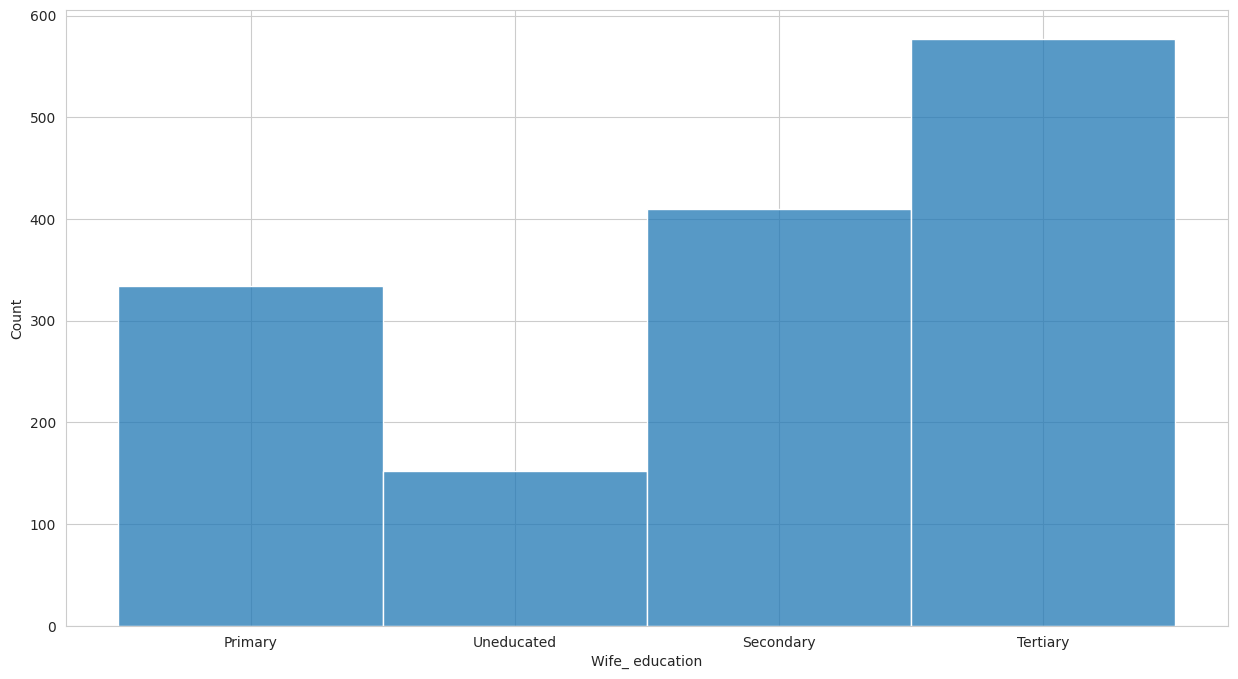

Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64


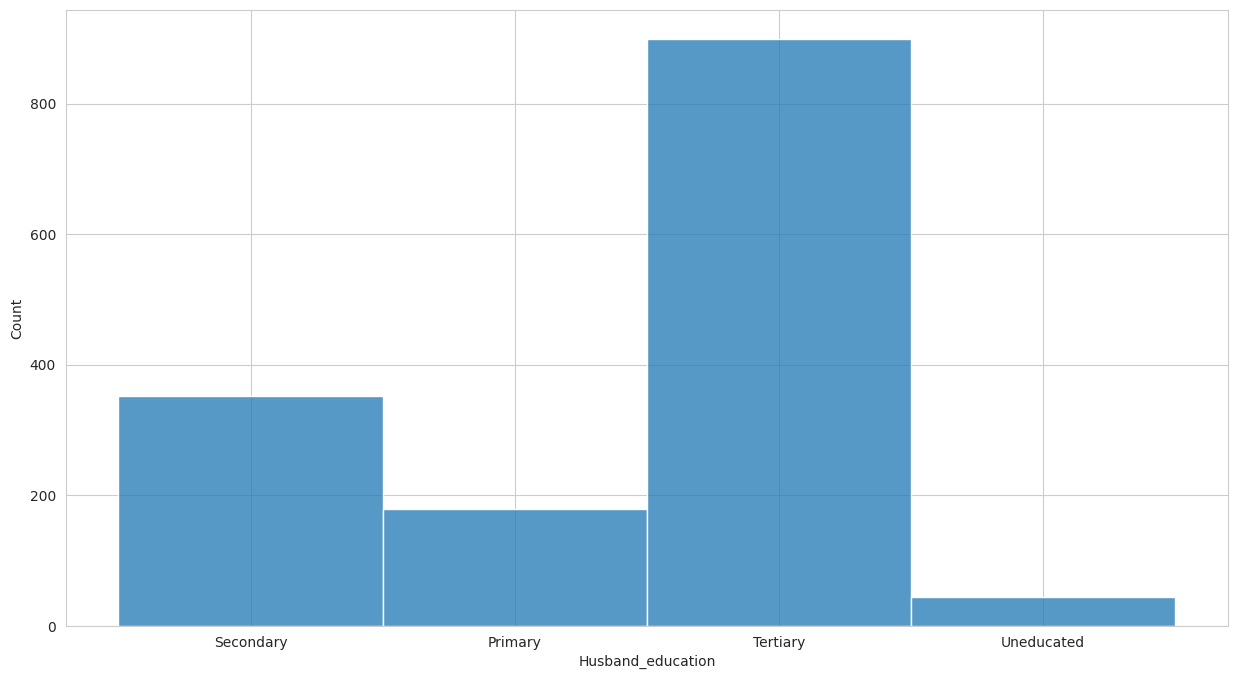

Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64


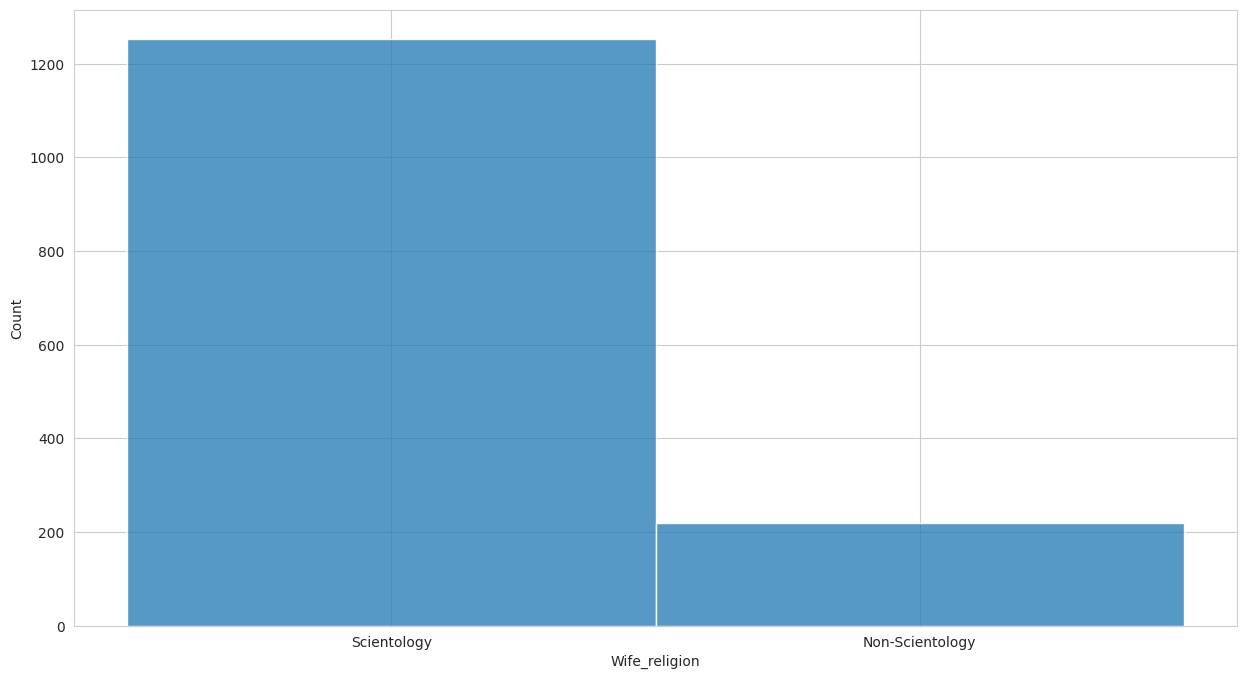

No     1104
Yes     369
Name: Wife_Working, dtype: int64


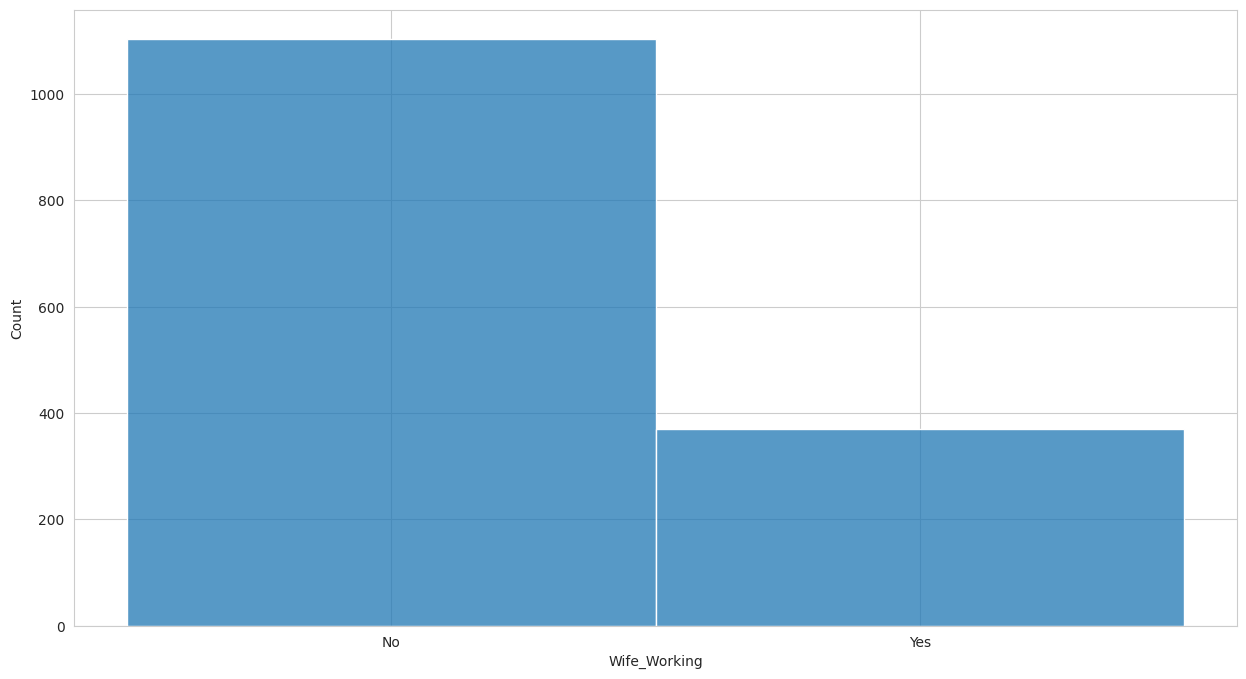

Very High    684
High         431
Low          229
Very Low     129
Name: Standard_of_living_index, dtype: int64


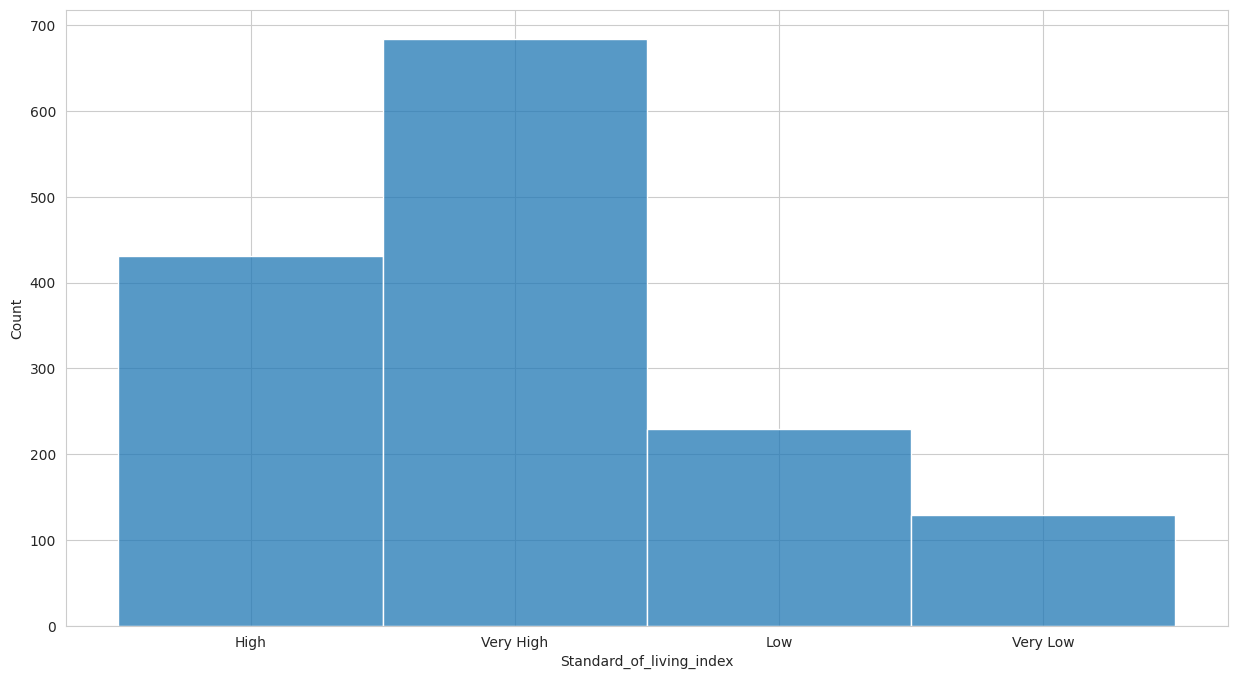

Exposed        1364
Not-Exposed     109
Name: Media_exposure , dtype: int64


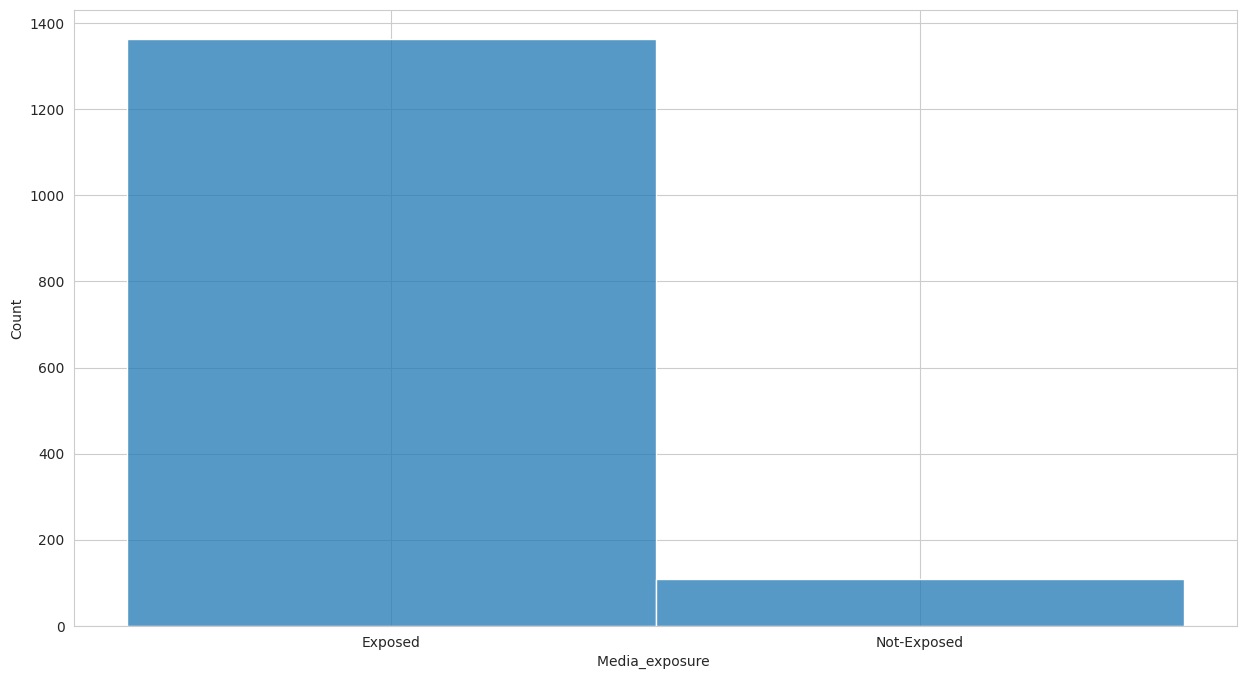

Yes    844
No     629
Name: Contraceptive_method_used, dtype: int64


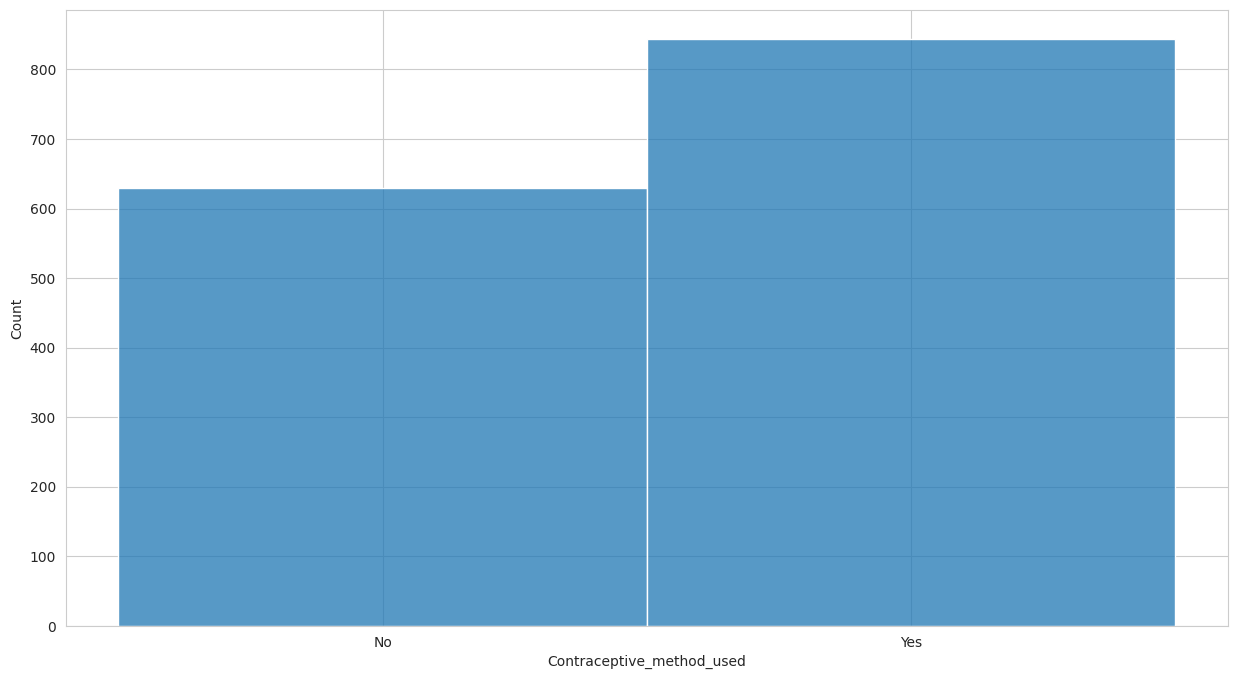

In [321]:
for i in df.columns:
  if df[i].dtypes == 'object':
    print(df[i].value_counts())
    sns.histplot(data =df, x = df[i]);
    plt.show()

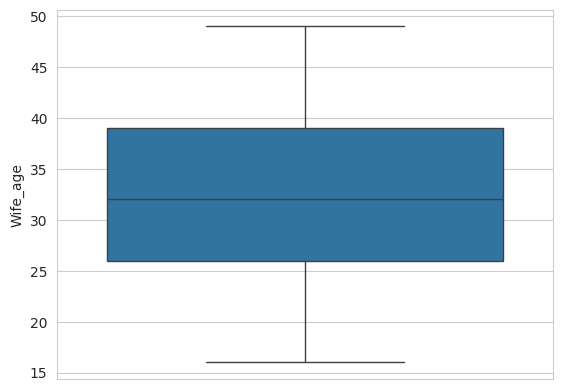

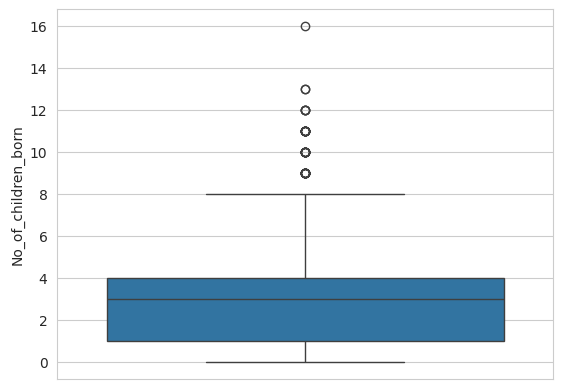

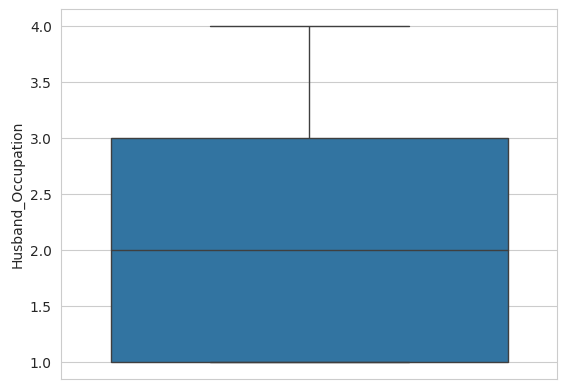

In [93]:
cols = ['Wife_age','No_of_children_born','Husband_Occupation']
for i in cols:
  sns.boxplot( df[i])
  plt.show()

Multivariate Analysis:

In [314]:
for i in df.columns:
  if df[i].dtypes == 'object':
    print(df[i].value_counts())
    sns.histplot(data =df, x = df[i], hue = 'Contraceptive_method_used');


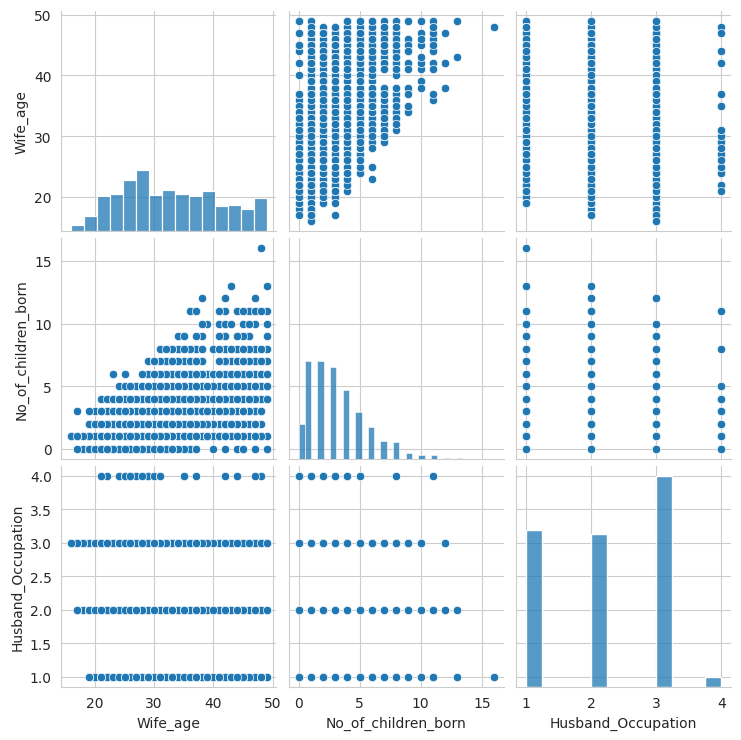

In [322]:
sns.pairplot(data =df);

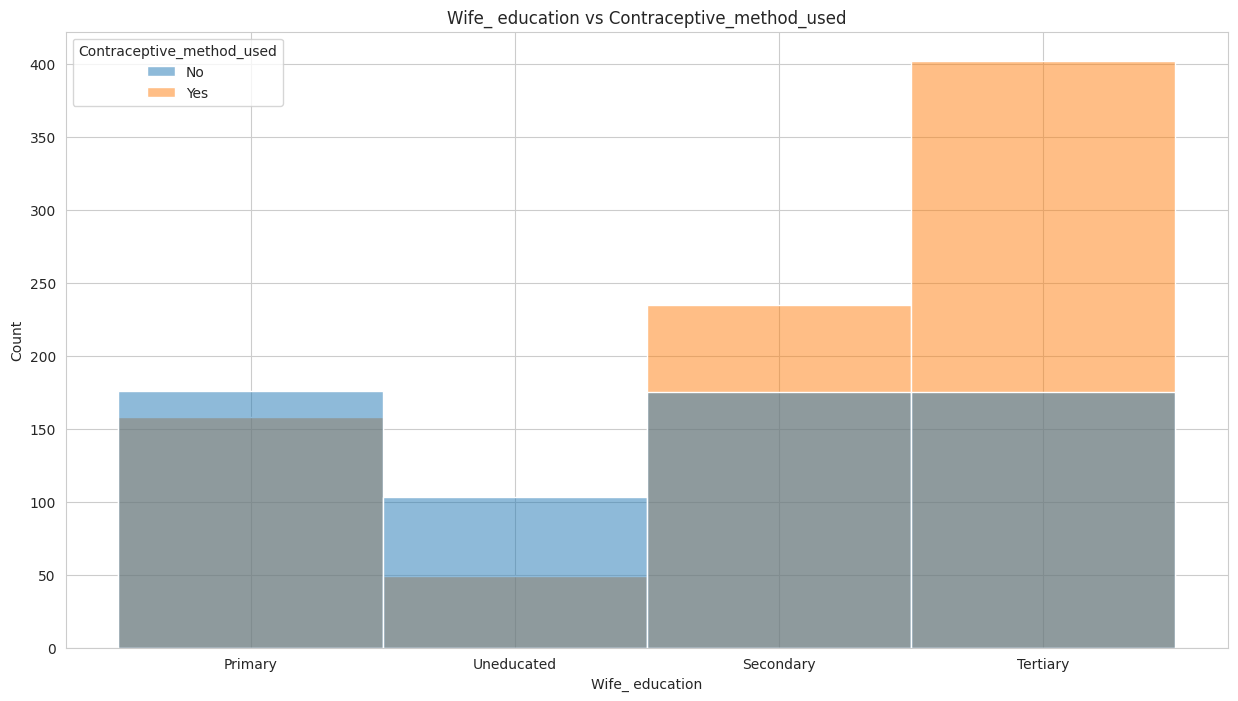

In [324]:
plt.title('Wife_ education vs Contraceptive_method_used')
plt.xlabel('Wife_ education')
sns.histplot(data =df, x = 'Wife_ education', hue = 'Contraceptive_method_used');

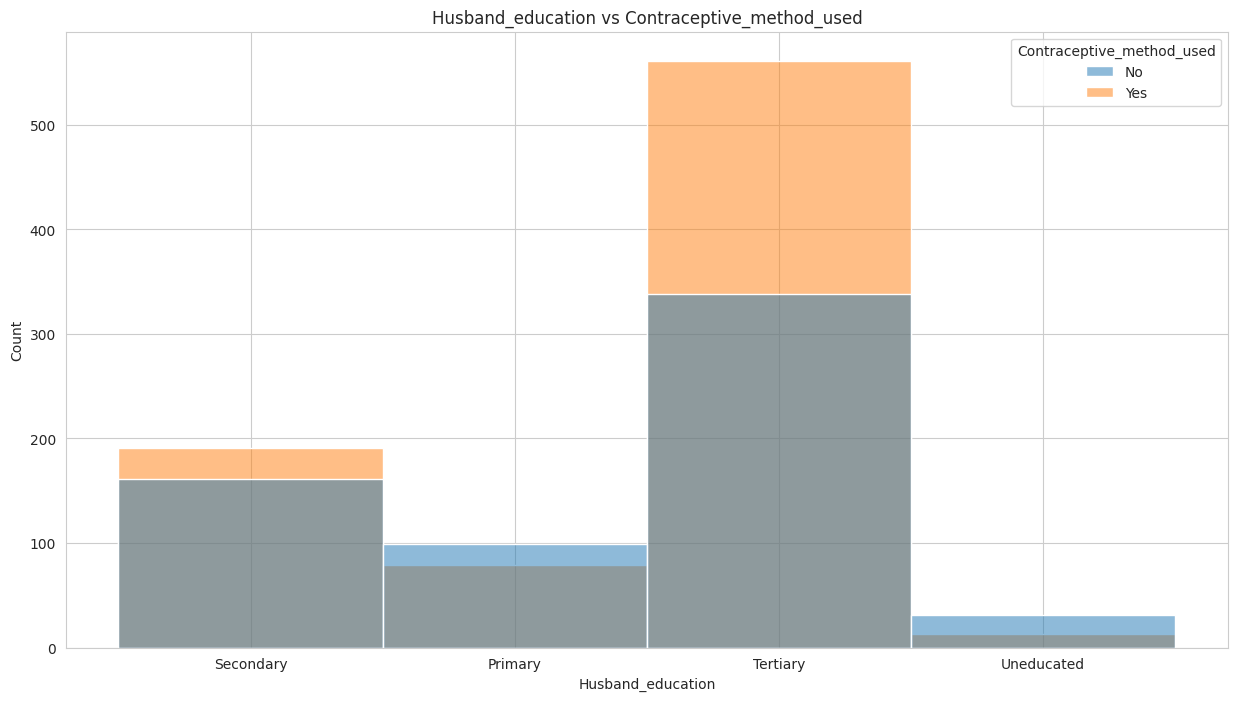

In [325]:
plt.title('Husband_education vs Contraceptive_method_used')
plt.xlabel('Husband_education')
sns.histplot(data =df, x = 'Husband_education', hue = 'Contraceptive_method_used');

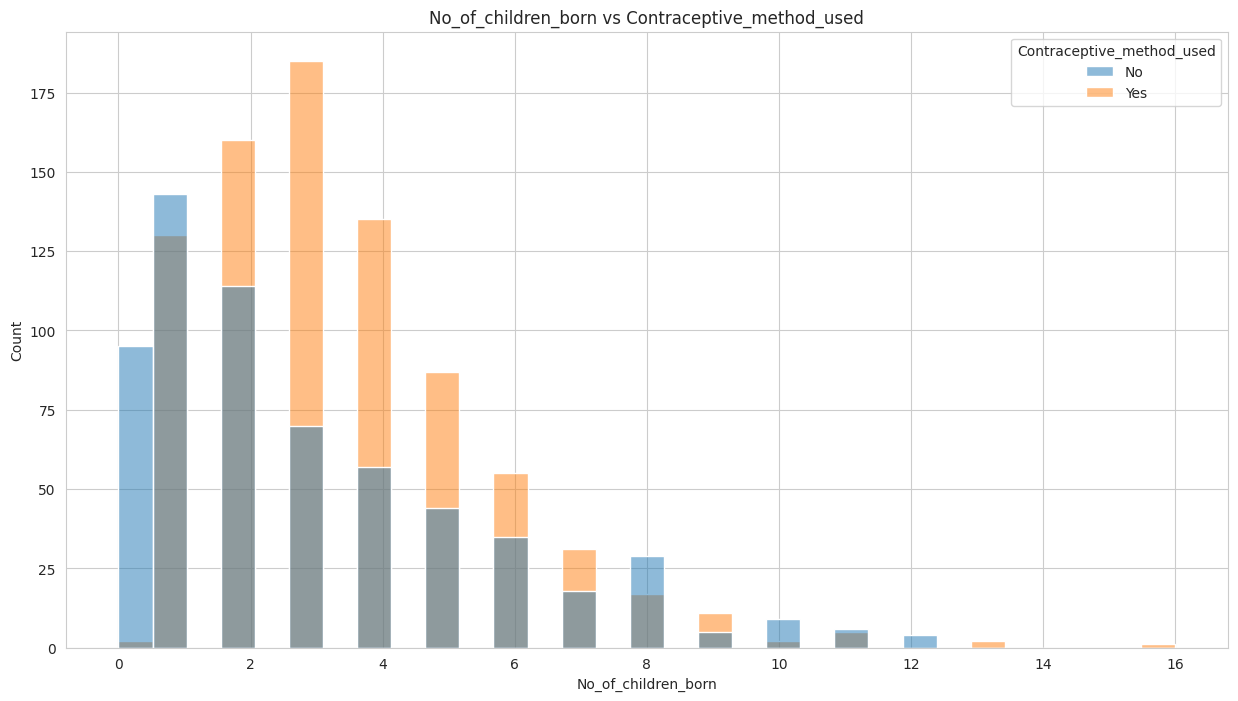

In [326]:
plt.title('No_of_children_born vs Contraceptive_method_used')
plt.xlabel('No_of_children_born')
sns.histplot(data =df, x = 'No_of_children_born', hue = 'Contraceptive_method_used');

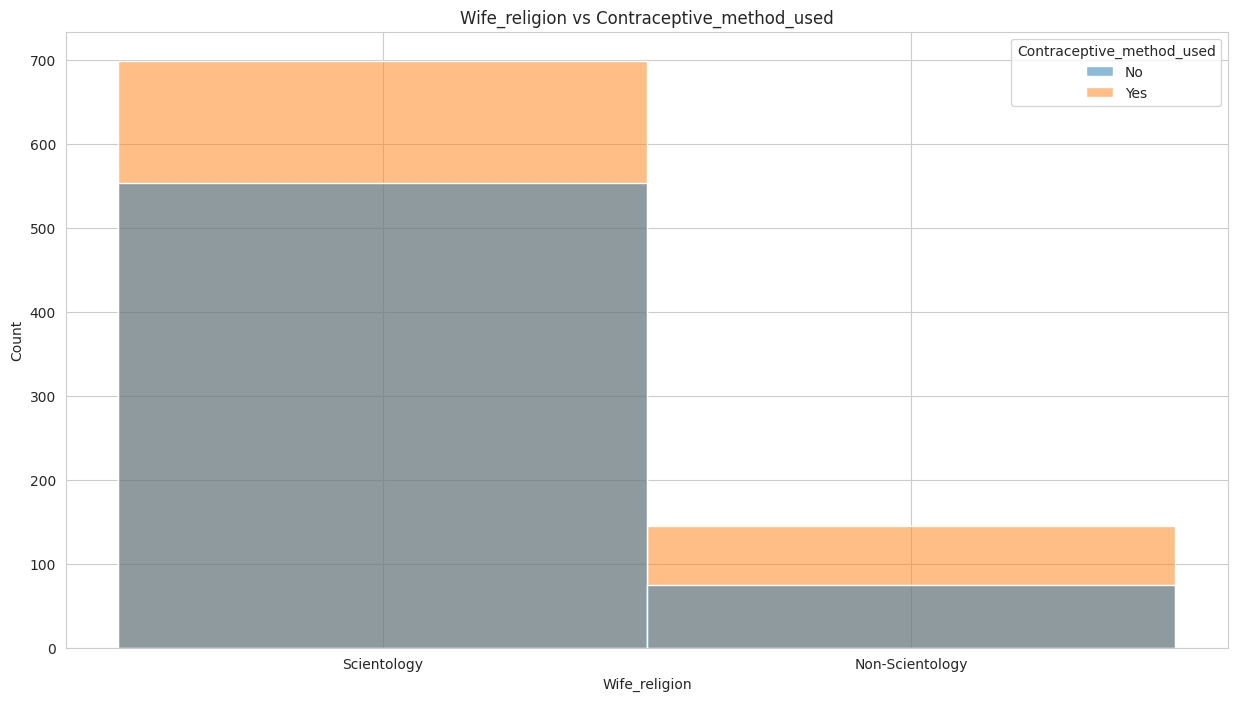

In [327]:
plt.title('Wife_religion vs Contraceptive_method_used')
plt.xlabel('Wife_religion')
sns.histplot(data =df, x = 'Wife_religion', hue = 'Contraceptive_method_used');

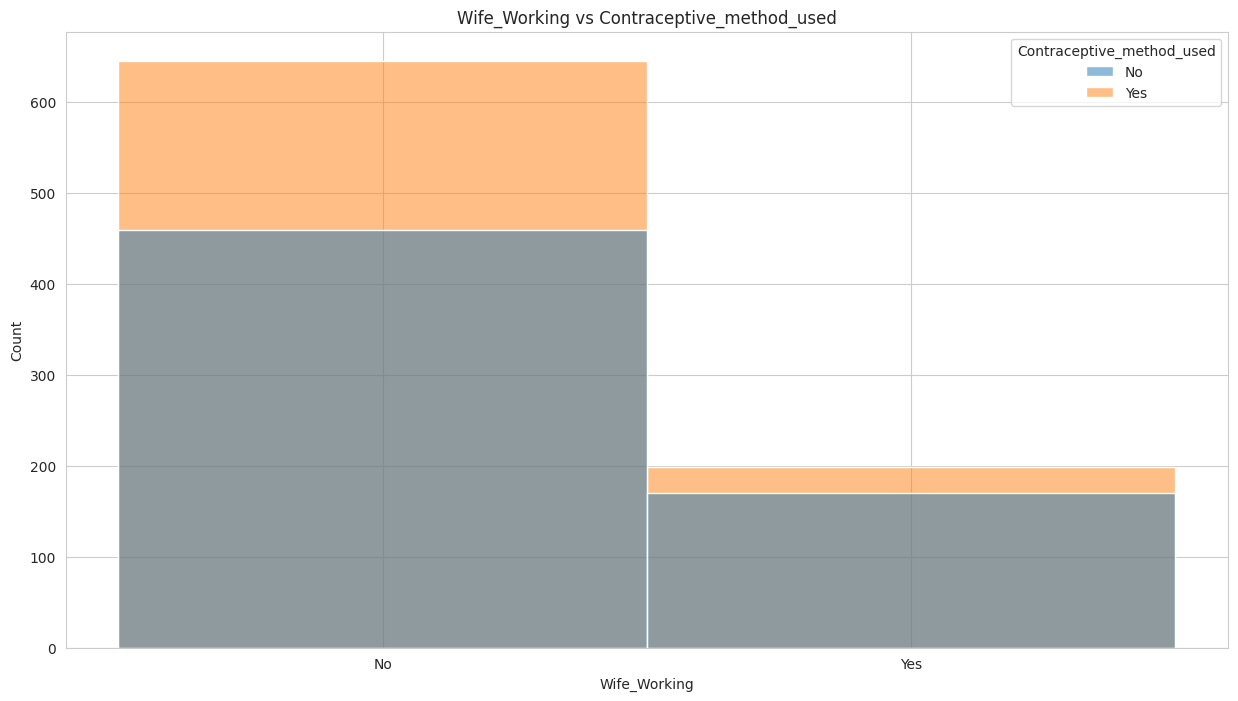

In [328]:
plt.title('Wife_Working vs Contraceptive_method_used')
plt.xlabel('Wife_Working')
sns.histplot(data =df, x = 'Wife_Working', hue = 'Contraceptive_method_used');

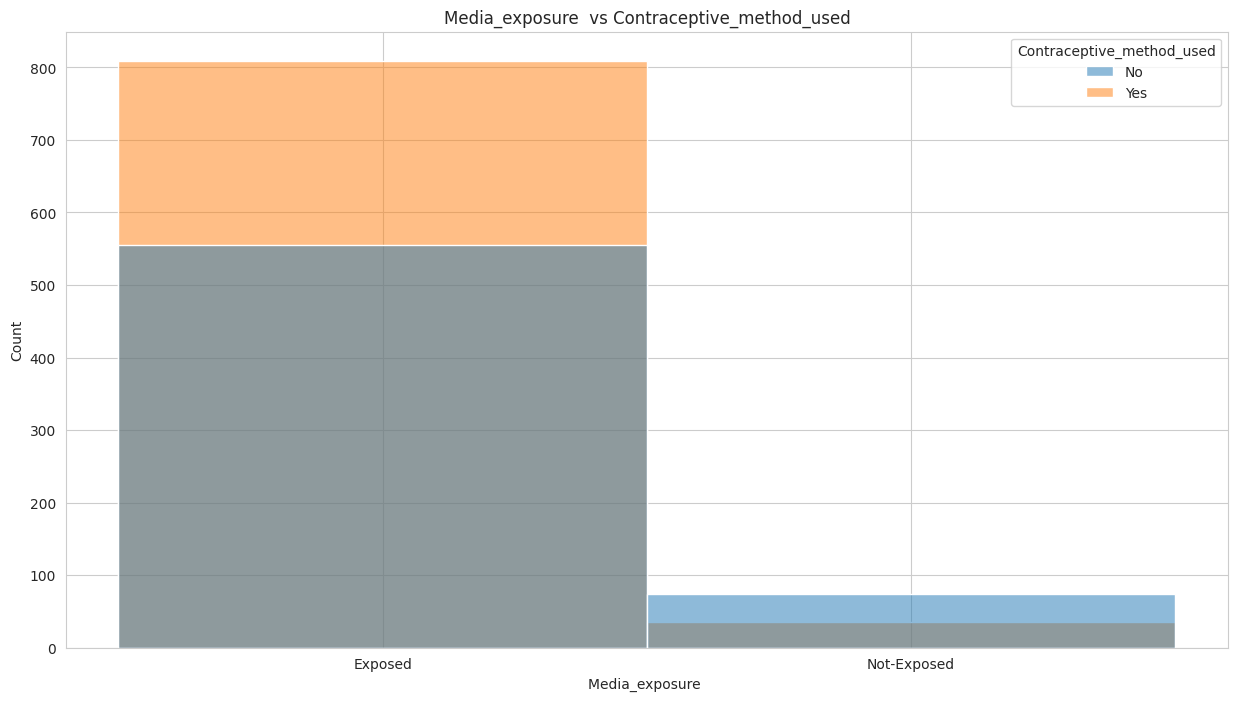

In [329]:
plt.title('Media_exposure  vs Contraceptive_method_used')
plt.xlabel('Media_exposure ')
sns.histplot(data =df, x = 'Media_exposure ', hue = 'Contraceptive_method_used');

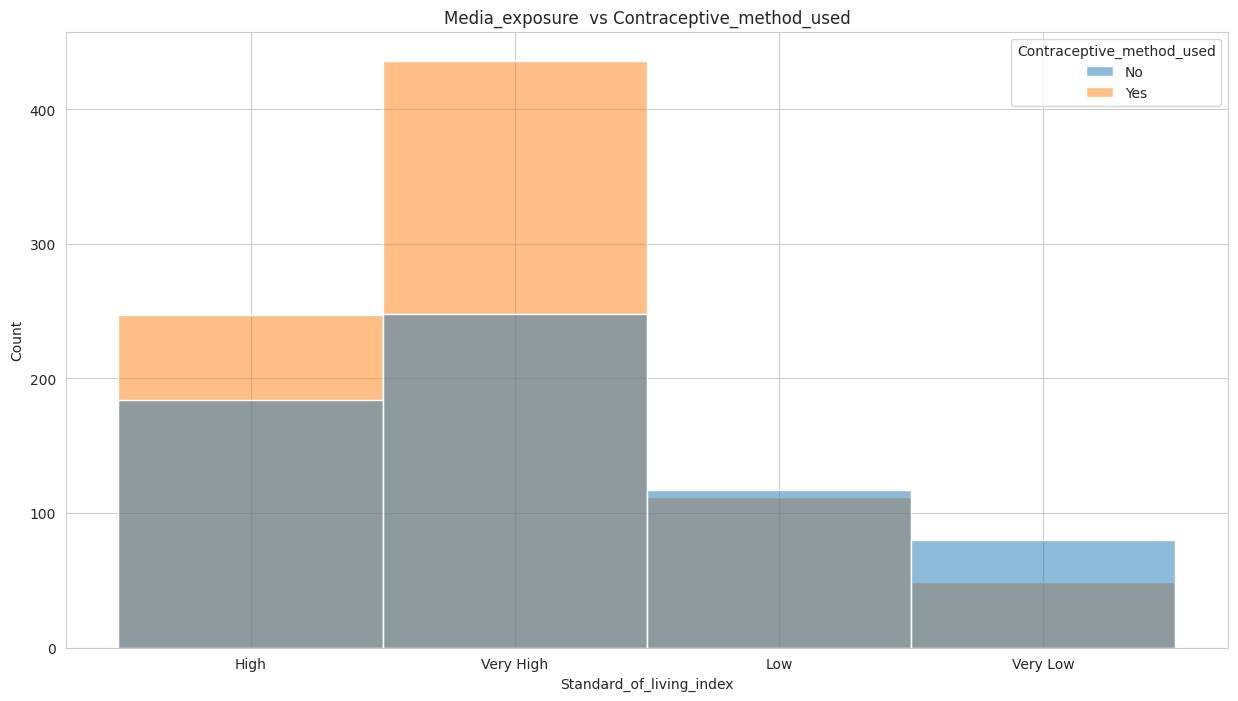

In [330]:
plt.title('Media_exposure  vs Contraceptive_method_used')
plt.xlabel('Standard_of_living_index')
sns.histplot(data =df, x = 'Standard_of_living_index', hue = 'Contraceptive_method_used');

insights:

Problem 2 - Data Pre-processing
Prepare the data for modelling: - Missing value Treatment (if needed) - Outlier Detection(treat, if needed) - Feature Engineering (if needed) - Encode the data - Train-test split

In [94]:
df.describe()

,Wife_age,No_of_children_born,Husband_Occupation
count,1402.000000,1452.000000,1473.000000
mean,32.606277,3.254132,2.137814
std,8.274927,2.365212,0.864857
min,16.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,39.000000,4.000000,3.000000
max,49.000000,16.000000,4.000000


In [95]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 80


,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
79,38.0,Tertiary,Tertiary,1.0,Scientology,Yes,1,Very High,Exposed,No
167,26.0,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
224,47.0,Tertiary,Tertiary,4.0,Scientology,No,1,Very High,Exposed,No
270,30.0,Tertiary,Tertiary,2.0,Scientology,No,1,Very High,Exposed,No
299,26.0,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
...,...,...,...,...,...,...,...,...,...,...
1367,44.0,Tertiary,Tertiary,5.0,Scientology,Yes,1,Very High,Exposed,Yes
1387,NaN,Secondary,Tertiary,2.0,Scientology,Yes,2,Very High,Exposed,Yes
1423,NaN,Tertiary,Tertiary,2.0,Non-Scientology,No,1,Very High,Exposed,Yes
1440,NaN,Tertiary,Tertiary,1.0,Non-Scientology,Yes,2,Very High,Exposed,Yes


Even the dataset has duplicates we dont have to treat them.

In [96]:
df.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [97]:
Wife_age =df['Wife_age'].mean()
No_of_child =df['No_of_children_born'].mean()

In [98]:
df['Wife_age'].replace(np.nan,Wife_age,inplace = True)
df['No_of_children_born'].replace(np.nan,No_of_child,inplace = True)

In [99]:
df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [100]:
df['No_of_children_born'].mean()

3.254132231404959

In [101]:
df['No_of_children_born'].value_counts()

2.000000     274
1.000000     273
3.000000     255
4.000000     192
5.000000     131
0.000000      97
6.000000      90
7.000000      49
8.000000      46
3.254132      21
9.000000      16
10.000000     11
11.000000     11
12.000000      4
13.000000      2
16.000000      1
Name: No_of_children_born, dtype: int64

In [102]:
df['Wife_age'].value_counts()

25.000000    77
32.606277    71
26.000000    66
32.000000    62
24.000000    60
35.000000    59
28.000000    58
30.000000    58
29.000000    58
27.000000    55
22.000000    55
33.000000    52
36.000000    49
37.000000    48
34.000000    46
21.000000    44
23.000000    43
38.000000    43
31.000000    43
47.000000    41
45.000000    40
42.000000    38
44.000000    38
43.000000    34
40.000000    34
39.000000    34
41.000000    32
48.000000    30
20.000000    27
49.000000    23
46.000000    21
19.000000    17
17.000000     8
18.000000     6
16.000000     3
Name: Wife_age, dtype: int64

In [103]:
df['Husband_Occupation'].value_counts()

3    585
1    436
2    425
4     27
Name: Husband_Occupation, dtype: int64

In [104]:
df.corr()

<ipython-input-104-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Wife_age,No_of_children_born,Husband_Occupation
Wife_age,1.000000,0.527019,-0.199495
No_of_children_born,0.527019,1.000000,-0.020857
Husband_Occupation,-0.199495,-0.020857,1.000000


<ipython-input-105-9cf44ef46a0c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));


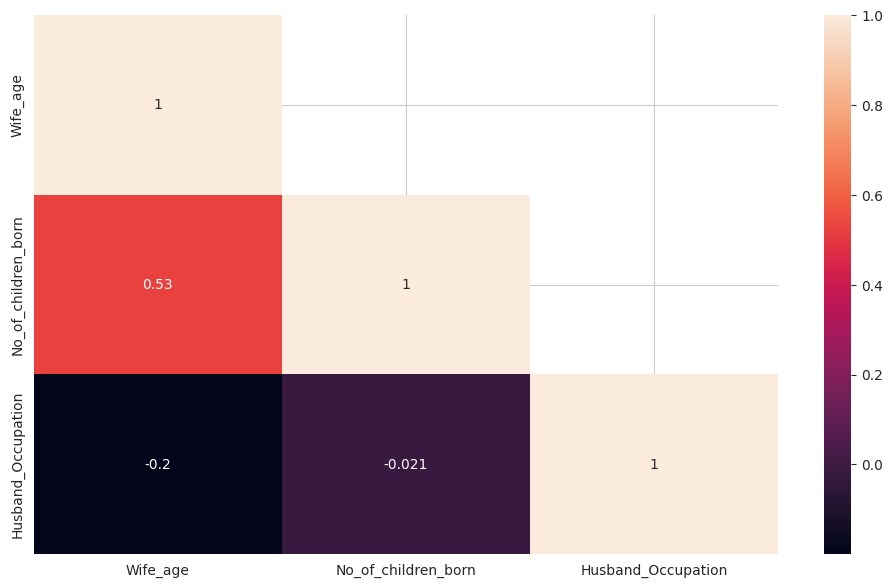

In [105]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));

In [106]:
for i in df.columns:
  if df[i].dtypes == 'object':
    print(df[i].value_counts(),'\n')


Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: Wife_ education, dtype: int64 

Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64 

Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64 

No     1104
Yes     369
Name: Wife_Working, dtype: int64 

Very High    684
High         431
Low          229
Very Low     129
Name: Standard_of_living_index, dtype: int64 

Exposed        1364
Not-Exposed     109
Name: Media_exposure , dtype: int64 

Yes    844
No     629
Name: Contraceptive_method_used, dtype: int64 



In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [108]:
df['Husband_Occupation']=np.where(df['Husband_Occupation'] =='1', 'WhiteCollar', df['Husband_Occupation'])
df['Husband_Occupation']=np.where(df['Husband_Occupation'] =='2', 'BlueCollar', df['Husband_Occupation'])
df['Husband_Occupation']=np.where(df['Husband_Occupation'] =='3', 'PurpleCollar', df['Husband_Occupation'])
df['Husband_Occupation']=np.where(df['Husband_Occupation'] =='4', 'GreenCollar', df['Husband_Occupation'])

In [109]:
df['Husband_Occupation'].value_counts()

PurpleCollar    585
1               436
BlueCollar      425
GreenCollar      27
Name: Husband_Occupation, dtype: int64

In [110]:
df['Husband_Occupation'] = df['Husband_Occupation'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   object 
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), object(8)
memory usage: 115.2+ KB


In [111]:
df['Contraceptive_method_used'] = df['Contraceptive_method_used'].replace({'No':'0','Yes':'1'})
df['Contraceptive_method_used'].value_counts()

1    844
0    629
Name: Contraceptive_method_used, dtype: int64

In [112]:
df['Contraceptive_method_used'] = df['Contraceptive_method_used'].astype('int64')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   object 
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [114]:
df_dummy = pd.get_dummies(df)
df_dummy.head()

,Wife_age,No_of_children_born,Contraceptive_method_used,Wife_ education_Primary,Wife_ education_Secondary,Wife_ education_Tertiary,Wife_ education_Uneducated,Husband_education_Primary,Husband_education_Secondary,Husband_education_Tertiary,...,Husband_Occupation_1,Husband_Occupation_BlueCollar,Husband_Occupation_GreenCollar,Husband_Occupation_PurpleCollar,Standard_of_living_index_High,Standard_of_living_index_Low,Standard_of_living_index_Very High,Standard_of_living_index_Very Low,Media_exposure _Exposed,Media_exposure _Not-Exposed
0,24.0,3.0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,45.0,10.0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1,0
2,43.0,7.0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
3,42.0,9.0,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,36.0,8.0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0


Train-Test split

In [115]:
X = df_dummy.drop('Contraceptive_method_used', axis=1)

# Copy target into the y dataframe.
y = df_dummy['Contraceptive_method_used']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df_dummy['Contraceptive_method_used'])

In [117]:
y_train.value_counts(1)

1    0.57323
0    0.42677
Name: Contraceptive_method_used, dtype: float64

In [118]:
y_test.value_counts(1)

1    0.572398
0    0.427602
Name: Contraceptive_method_used, dtype: float64

Problem 2 - Model Building and Compare the Performance of the Models
- Build a Logistic Regression model - Build a Linear Discriminant Analysis model - Build a CART model - Prune the CART model by finding the best hyperparameters using GridSearch - Check the performance of the models across train and test set using different metrics - Compare the performance of all the models built and choose the best one with proper rationale

**Build a Logistic Regression model**

In [119]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [120]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [121]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [122]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.204485,0.795515
1,0.877780,0.122220
2,0.970769,0.029231
3,0.352746,0.647254
4,0.266867,0.733133


In [123]:
model.score(X_train, y_train)

0.6905916585838991

AUC: 0.723


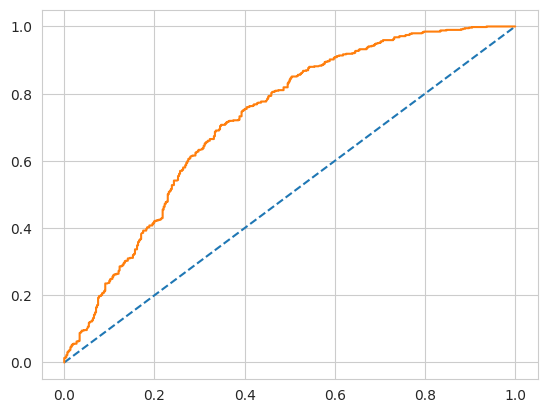

In [124]:
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [125]:
model.score(X_test, y_test)

0.6561085972850679

AUC: 0.723


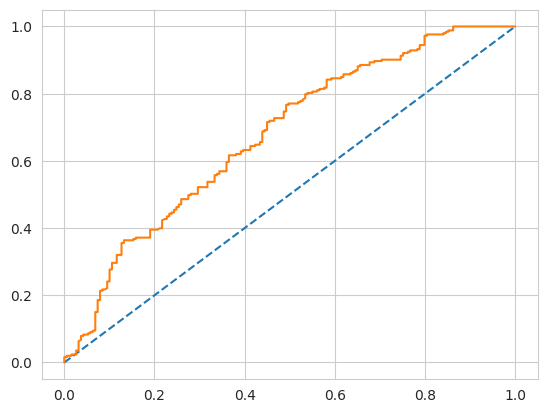

In [126]:
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [127]:
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[222, 218],
       [101, 490]])

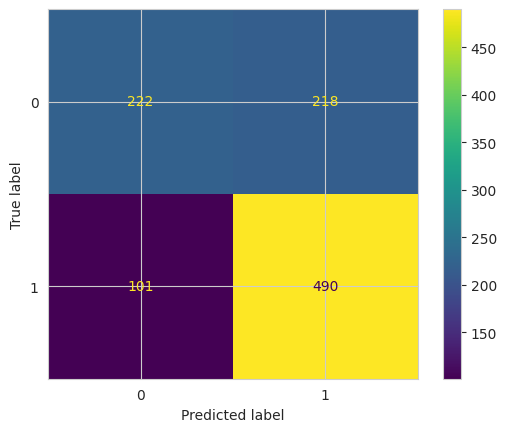

In [128]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [129]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58       440
           1       0.69      0.83      0.75       591

    accuracy                           0.69      1031
   macro avg       0.69      0.67      0.67      1031
weighted avg       0.69      0.69      0.68      1031



Confusion Matrix for test data

In [130]:
cm = confusion_matrix(y_test, ytest_predict)
cm

array([[ 87, 102],
       [ 50, 203]])

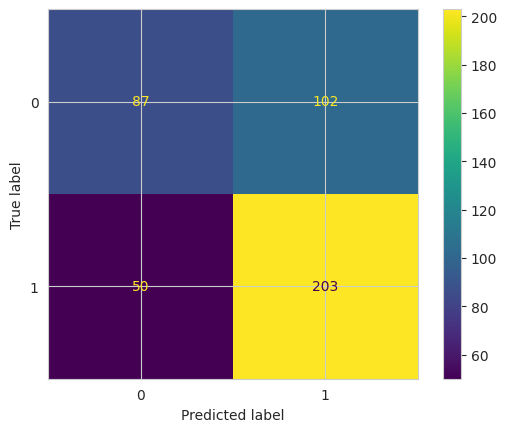

In [131]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [132]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.46      0.53       189
           1       0.67      0.80      0.73       253

    accuracy                           0.66       442
   macro avg       0.65      0.63      0.63       442
weighted avg       0.65      0.66      0.64       442



Applying GridSearchCV for Logistic Regression

In [133]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [134]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [135]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [136]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [137]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [138]:
best_model = grid_search.best_estimator_

In [139]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [140]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.204583,0.795417
1,0.876148,0.123852
2,0.970092,0.029908
3,0.352884,0.647116
4,0.267231,0.732769


In [141]:
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[220, 220],
       [ 99, 492]])

              precision    recall  f1-score   support

           0       0.69      0.50      0.58       440
           1       0.69      0.83      0.76       591

    accuracy                           0.69      1031
   macro avg       0.69      0.67      0.67      1031
weighted avg       0.69      0.69      0.68      1031
 



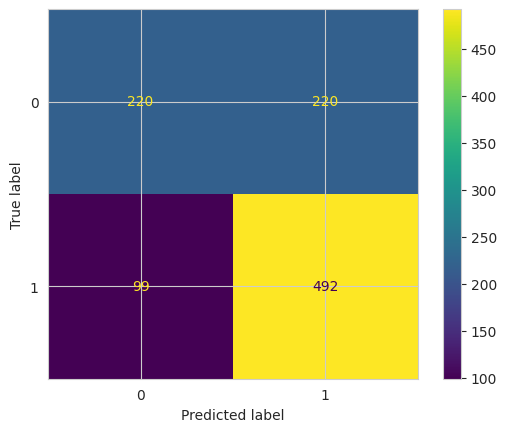

In [142]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.64      0.46      0.53       189
           1       0.67      0.80      0.73       253

    accuracy                           0.66       442
   macro avg       0.65      0.63      0.63       442
weighted avg       0.65      0.66      0.64       442
 



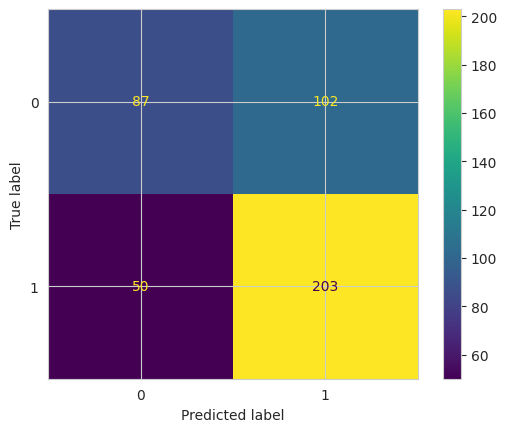

In [143]:
cm = confusion_matrix(y_test, ytest_predict)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
print(classification_report(y_test, ytest_predict),'\n');

In [144]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, ytest_predict).ravel()

In [145]:
tn,fp,fn,tp

(87, 102, 50, 203)

In [146]:
(tp+tn)/(tp+tn+fp+fn)# ACCURACY of predicting 0's and 1's correctly

0.6561085972850679

In [147]:
tp/(tp+fp)#Precision for 1's

0.6655737704918033

In [148]:
tp/(tp+fn)#Recall for 1's

0.8023715415019763

Inferences :

For No Contraceptive_method_used (Label 0 ):

Precision (69%) – 69% of women predicted are not opting for Contraceptive_method.

Recall (51%) – 51% of women predicted are not opting for Contraceptive_method, 51% have been predicted correctly .

For Contraceptive_method_used (Label 1 ):

Precision (67%) – 67% of women predicted are opting for Contraceptive_method.

Recall (81%) – 81% of women predicted are opting for Contraceptive_method, 81% of women have been predicted correctly .

**END of Logistic Modelling**

## **Build a Linear Discriminant Analysis model**

In [149]:
path_excel = "/content/drive/My Drive/Module_5_Predictive_Modelling_Week_5_Project/Contraceptive_method_dataset.xlsx"
db = pd.read_excel(path_excel)
db

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No
...,...,...,...,...,...,...,...,...,...,...
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes


In [150]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [151]:
db.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [152]:
db['Wife_age'].replace(np.nan,Wife_age,inplace = True)
db['No_of_children_born'].replace(np.nan,No_of_child,inplace = True)

In [153]:
db.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [154]:
for i in db.columns:
  if db[i].dtypes == 'object':
    print(db[i].value_counts(),'\n')

Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: Wife_ education, dtype: int64 

Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64 

Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64 

No     1104
Yes     369
Name: Wife_Working, dtype: int64 

Very High    684
High         431
Low          229
Very Low     129
Name: Standard_of_living_index, dtype: int64 

Exposed        1364
Not-Exposed     109
Name: Media_exposure , dtype: int64 

Yes    844
No     629
Name: Contraceptive_method_used, dtype: int64 



In [155]:
db['Wife_ education'] = db['Wife_ education'].replace({'Tertiary':'0','Secondary':'1','Primary':'2','Uneducated':'3'})
db['Wife_ education'] = db['Wife_ education'].astype('int64')
db['Wife_ education'].value_counts()

0    577
1    410
2    334
3    152
Name: Wife_ education, dtype: int64

In [156]:
db['Husband_education'] = db['Husband_education'].replace({'Tertiary':'0','Secondary':'1','Primary':'2','Uneducated':'3'})
db['Husband_education'] = db['Husband_education'].astype('int64')
db['Husband_education'].value_counts()

0    899
1    352
2    178
3     44
Name: Husband_education, dtype: int64

In [157]:
db['Wife_religion'] = db['Wife_religion'].replace({'Non-Scientology':'0','Scientology':'1'})
db['Wife_religion'] = db['Wife_religion'].astype('int64')
db['Wife_religion'].value_counts()

1    1253
0     220
Name: Wife_religion, dtype: int64

In [158]:
db['Wife_Working'] = db['Wife_Working'].replace({'No':'0','Yes':'1'})
db['Wife_Working'] = db['Wife_Working'].astype('int64')
db['Wife_Working'].value_counts()

0    1104
1     369
Name: Wife_Working, dtype: int64

In [159]:
db['Standard_of_living_index'] = db['Standard_of_living_index'].replace({'Very Low':'0','Low':'1','High':'2','Very High':'3'})
db['Standard_of_living_index'] = db['Standard_of_living_index'].astype('int64')
db['Standard_of_living_index'].value_counts()

3    684
2    431
1    229
0    129
Name: Standard_of_living_index, dtype: int64

In [160]:
db['Media_exposure '] = db['Media_exposure '].replace({'Not-Exposed':'0','Exposed':'1'})
db['Media_exposure '] = db['Media_exposure '].astype('int64')
db['Media_exposure '].value_counts()

1    1364
0     109
Name: Media_exposure , dtype: int64

In [161]:
db['Contraceptive_method_used'] = db['Contraceptive_method_used'].replace({'No':'0','Yes':'1'})
db['Contraceptive_method_used'] = db['Contraceptive_method_used'].astype('int64')
db['Contraceptive_method_used'].value_counts()

1    844
0    629
Name: Contraceptive_method_used, dtype: int64

In [162]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   int64  
 2   Husband_education          1473 non-null   int64  
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   int64  
 5   Wife_Working               1473 non-null   int64  
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   int64  
 8   Media_exposure             1473 non-null   int64  
 9   Contraceptive_method_used  1473 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 115.2 KB


In [163]:
df.describe()

,Wife_age,No_of_children_born,Contraceptive_method_used
count,1473.000000,1473.000000,1473.000000
mean,32.606277,3.254132,0.572980
std,8.072896,2.348280,0.494813
min,16.000000,0.000000,0.000000
25%,26.000000,1.000000,0.000000
50%,32.000000,3.000000,1.000000
75%,38.000000,4.000000,1.000000
max,49.000000,16.000000,1.000000


In [164]:
db.Contraceptive_method_used.value_counts(normalize=True)

1    0.57298
0    0.42702
Name: Contraceptive_method_used, dtype: float64

In [165]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8


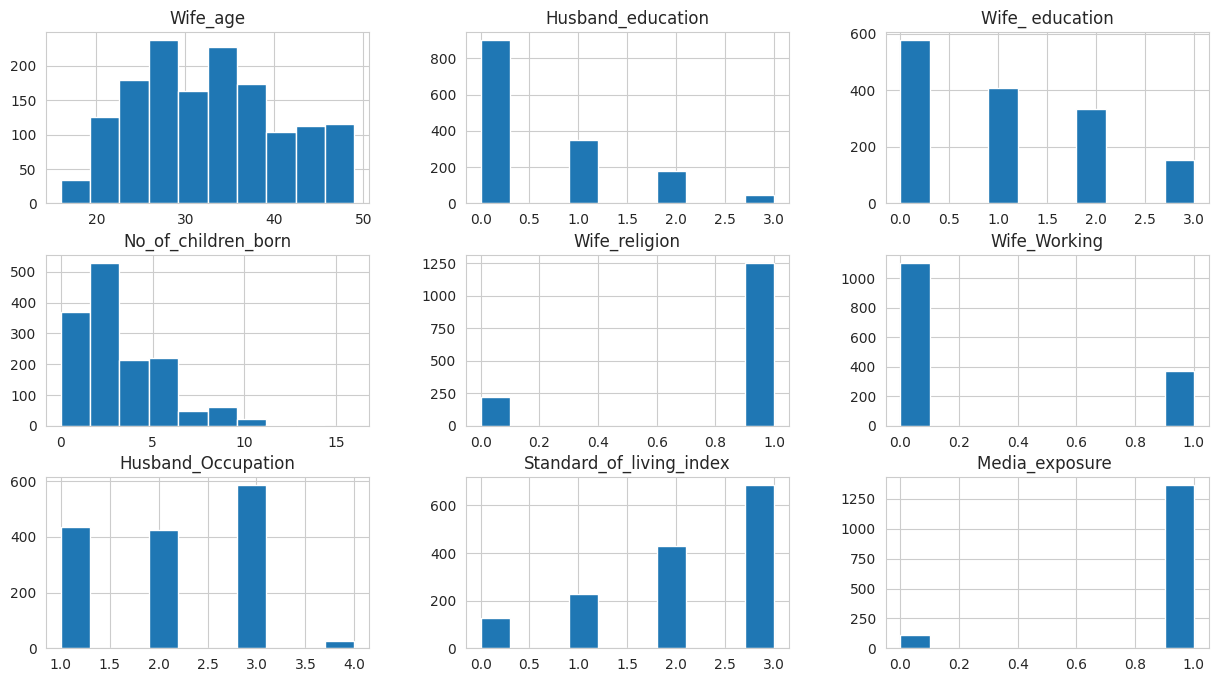

In [166]:
db[['Wife_age','Husband_education','Wife_ education','No_of_children_born','Wife_religion','Wife_Working','Husband_Occupation','Standard_of_living_index','Media_exposure ']].hist();

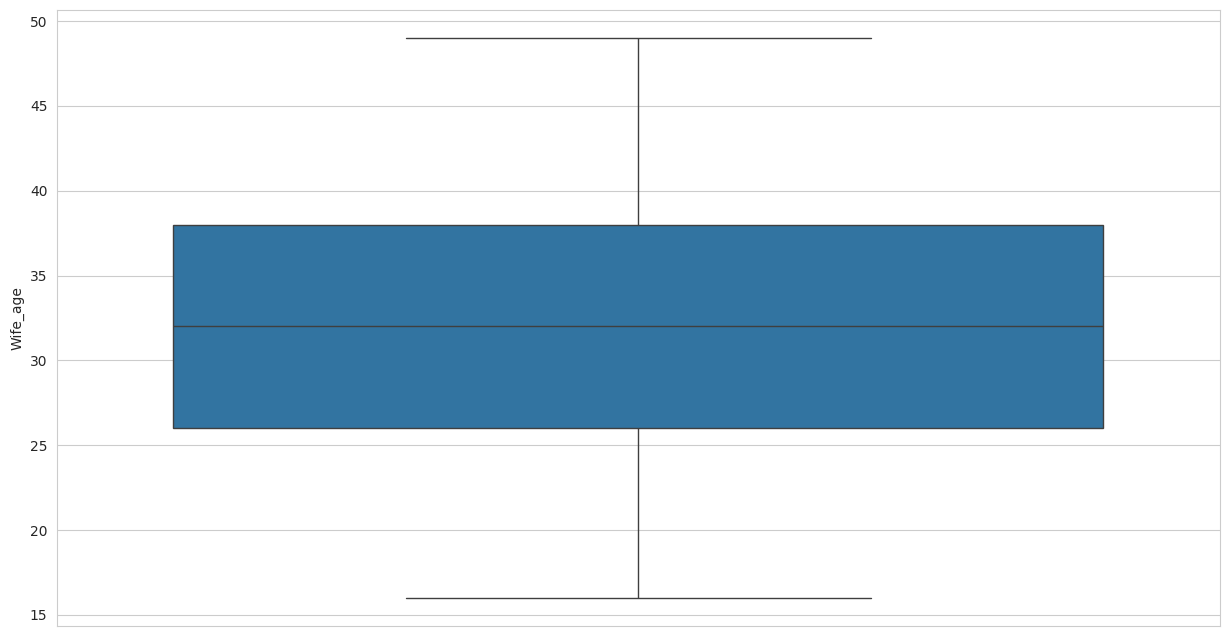

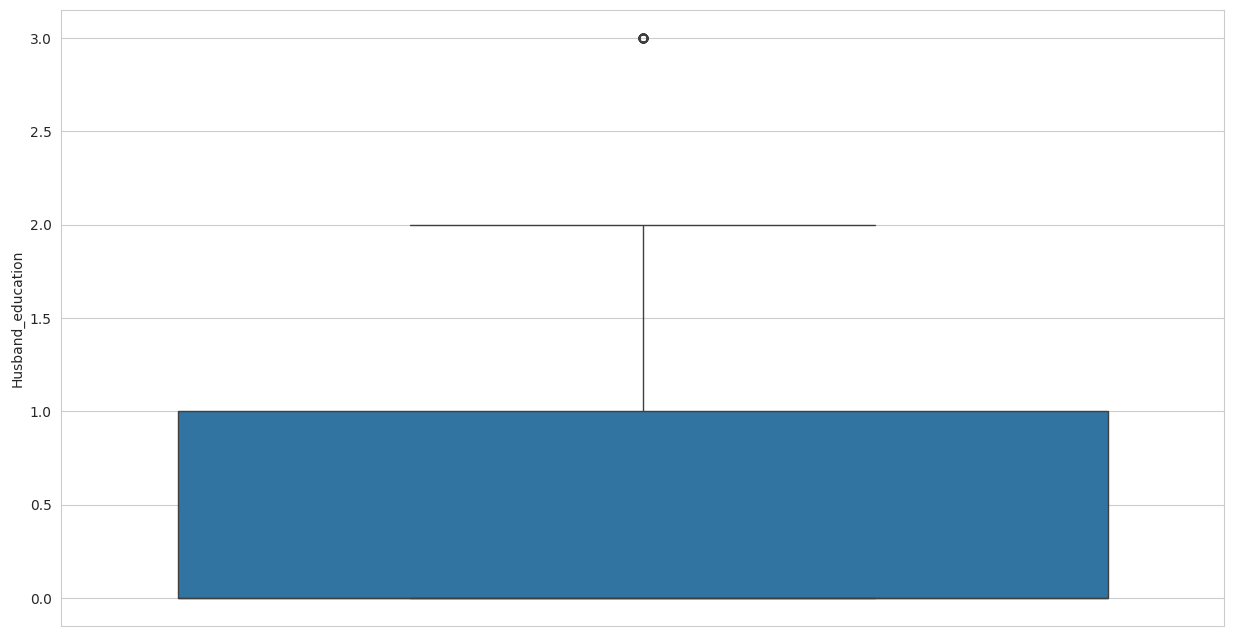

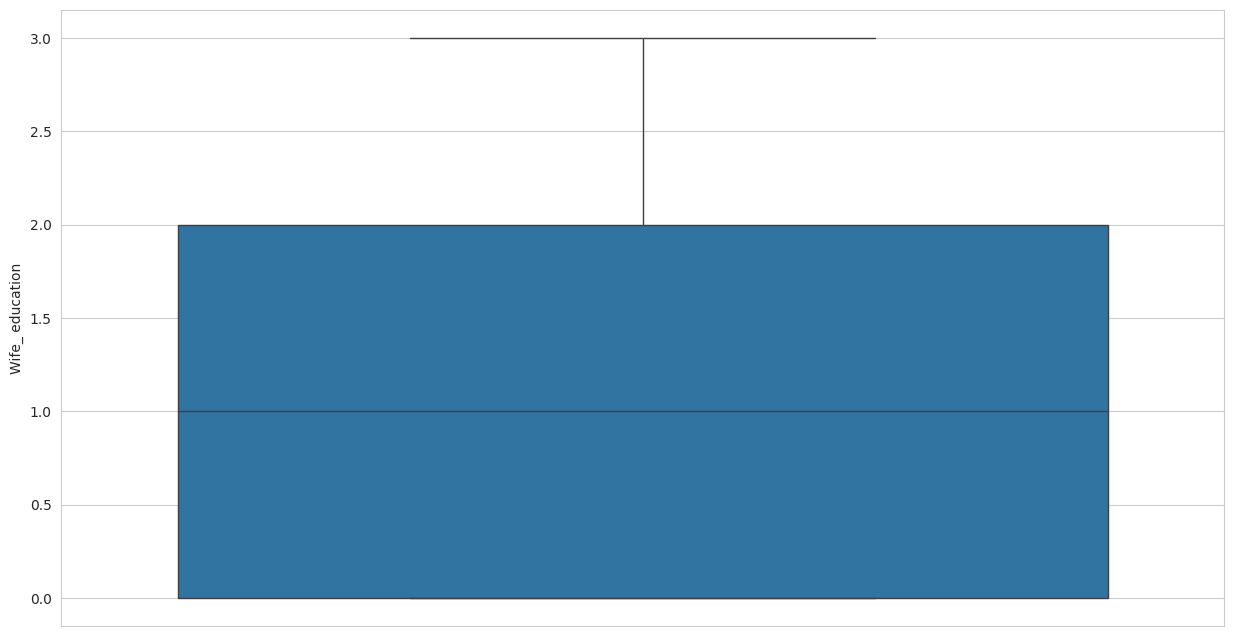

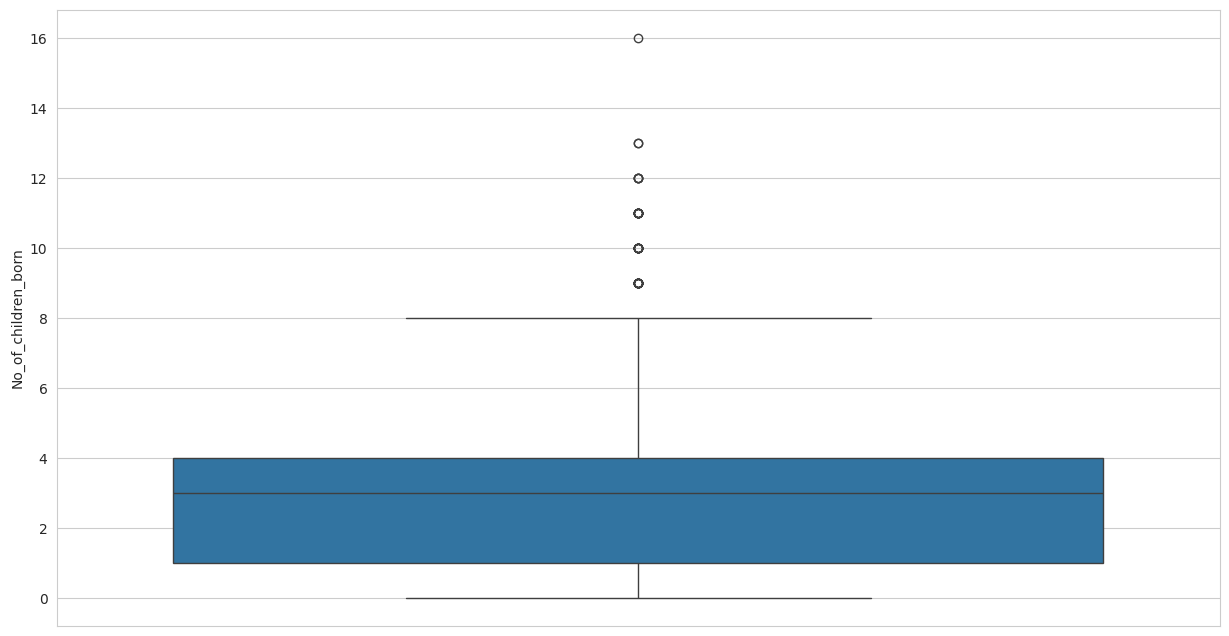

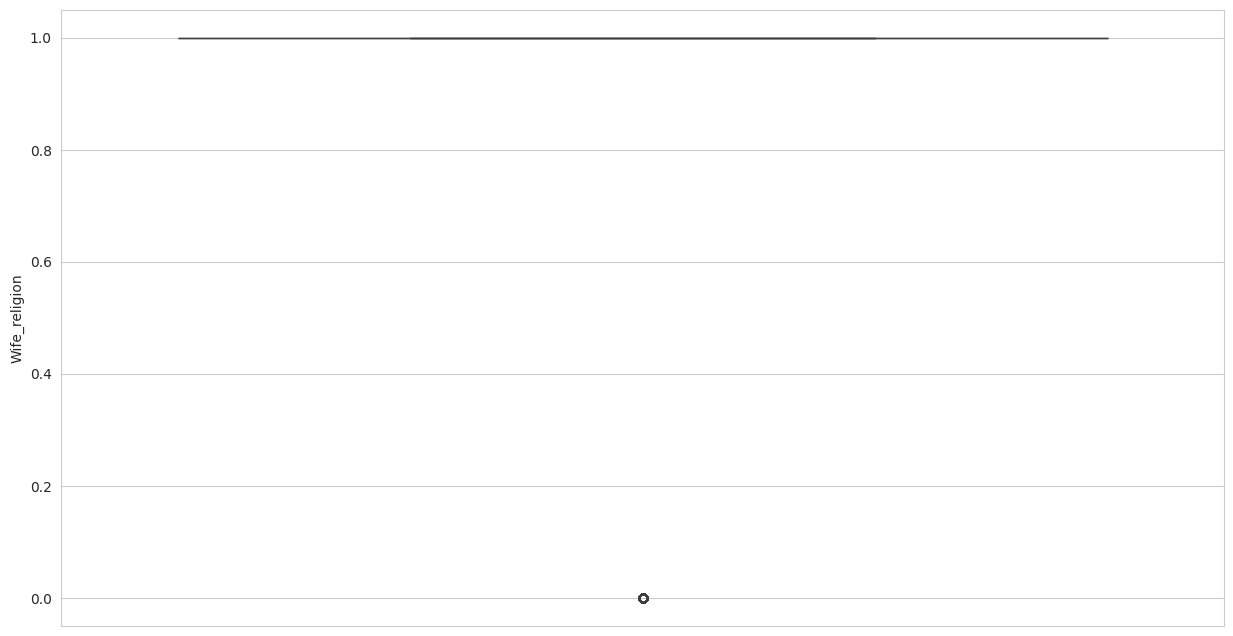

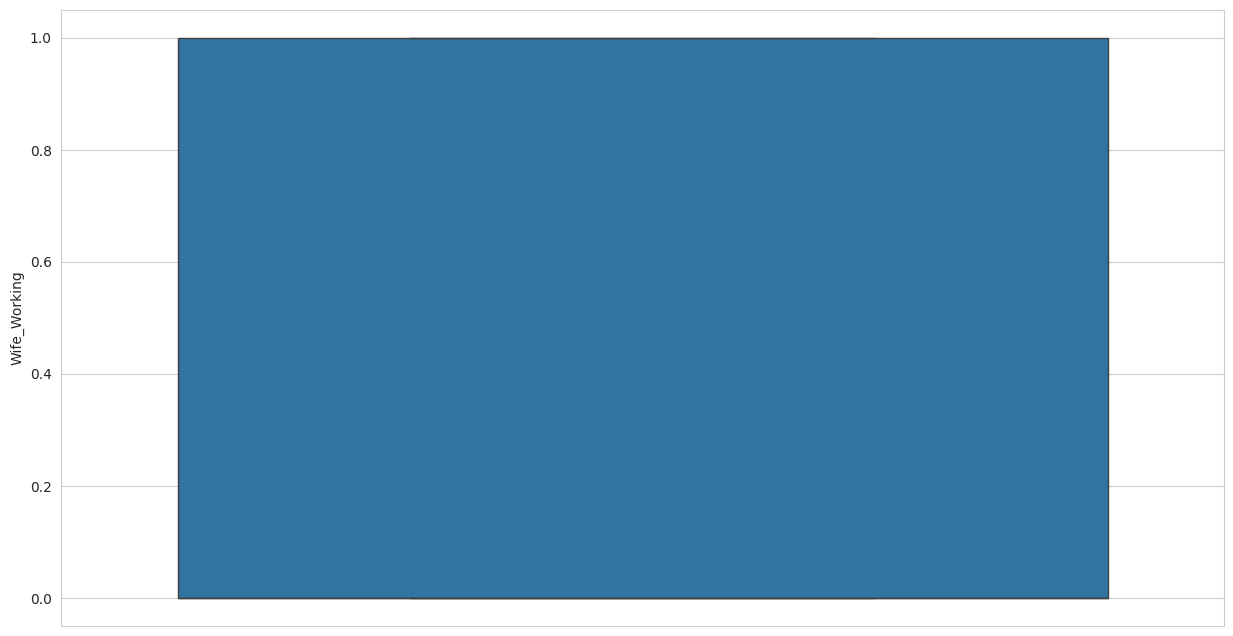

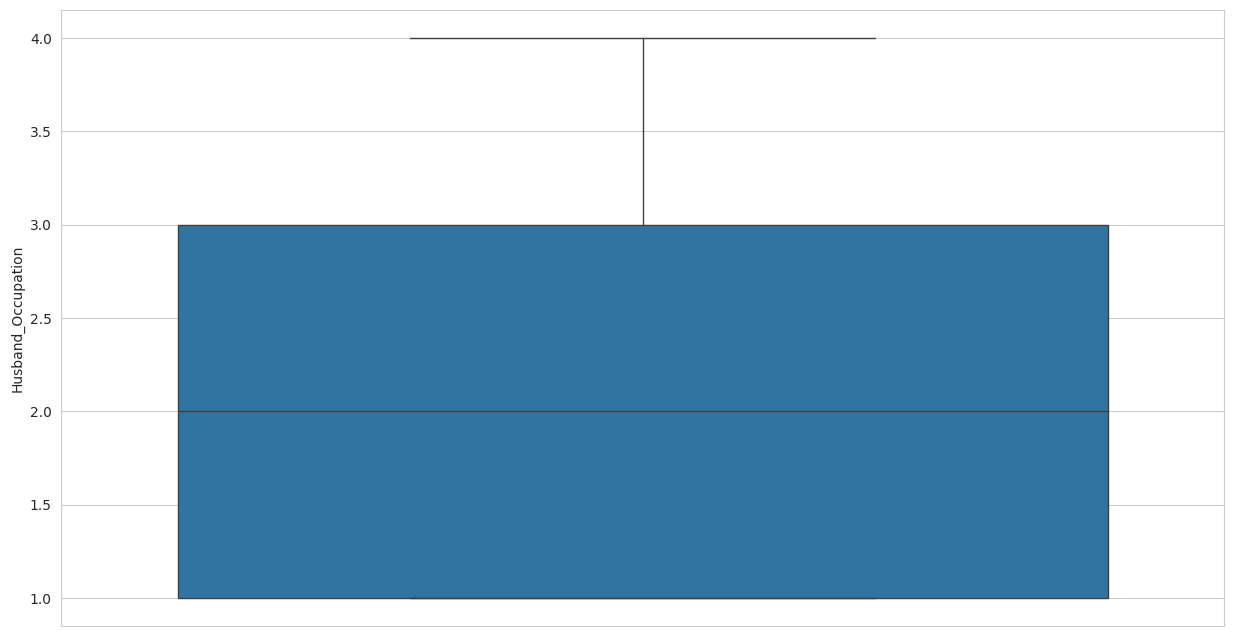

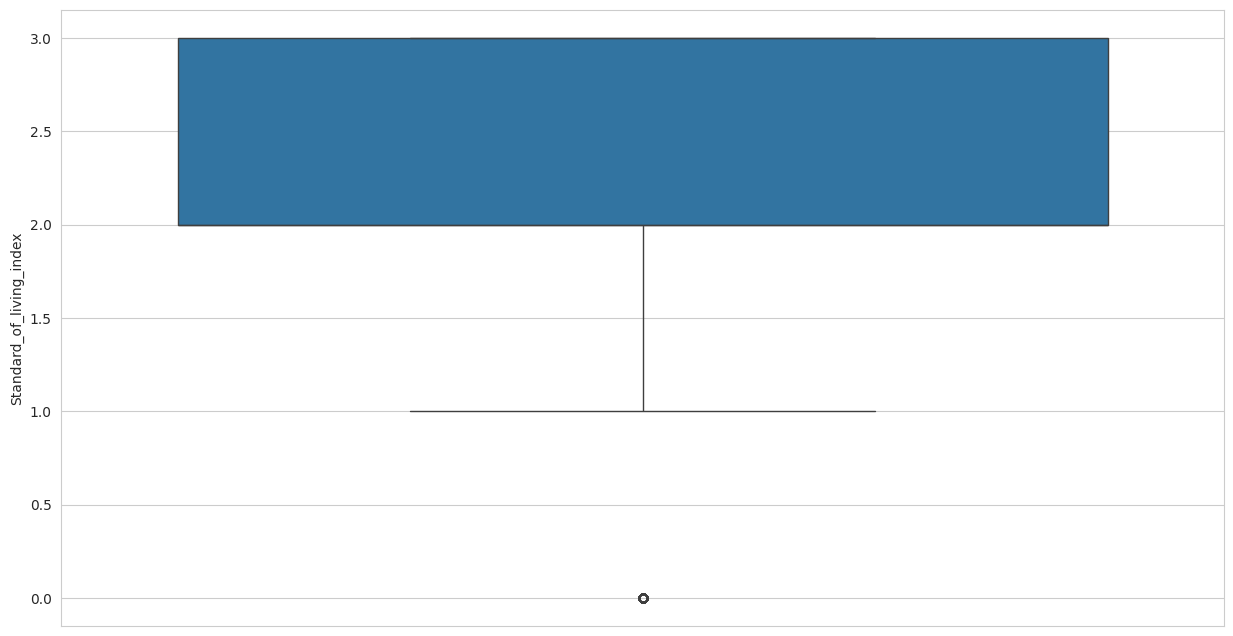

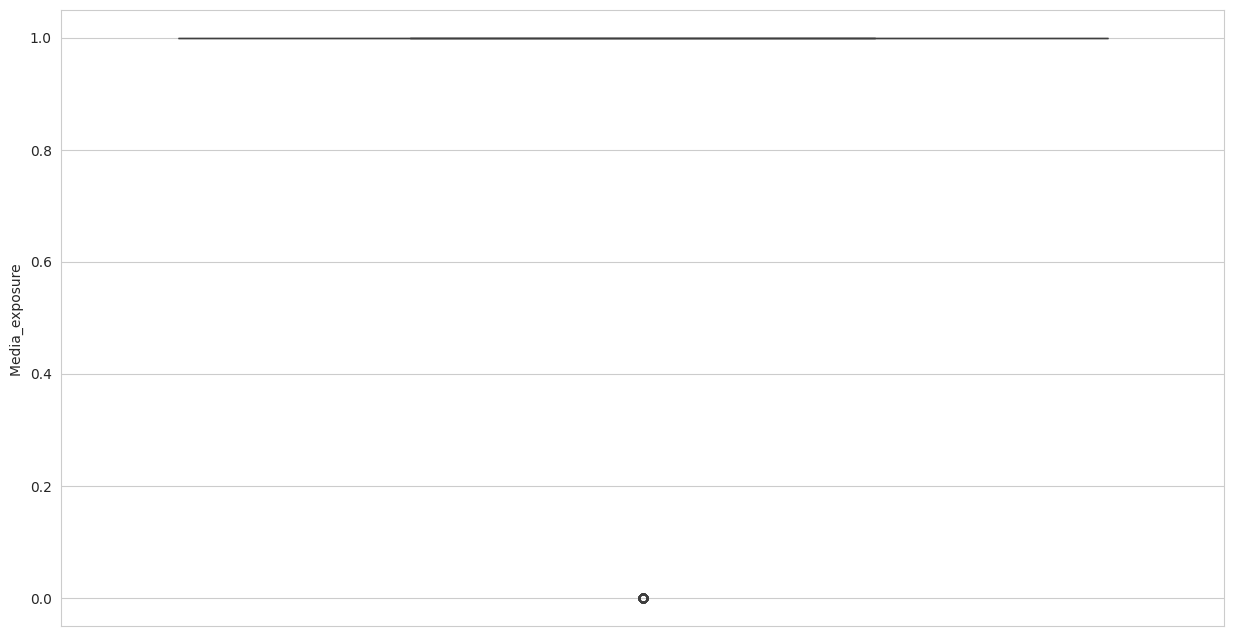

In [167]:
cols=['Wife_age','Husband_education','Wife_ education','No_of_children_born','Wife_religion','Wife_Working','Husband_Occupation','Standard_of_living_index','Media_exposure '];

for i in cols:
    sns.boxplot(db[i])
    plt.show()

**Train - Test Split**

In [168]:
db.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,2,1,3.0,1,0,2,2,1,0
1,45.0,3,1,10.0,1,0,3,3,1,0
2,43.0,2,1,7.0,1,0,3,3,1,0
3,42.0,1,2,9.0,1,0,3,2,1,0
4,36.0,1,1,8.0,1,0,3,1,1,0


In [169]:
X = db.drop('Contraceptive_method_used',axis=1)
Y = db.pop('Contraceptive_method_used')

In [170]:
Y.value_counts()

1    844
0    629
Name: Contraceptive_method_used, dtype: int64

In [171]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import scale


In [172]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [173]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (1031, 9)
Number of rows and columns of the training set for the dependent variable: (1031,)
Number of rows and columns of the test set for the independent variables: (442, 9)
Number of rows and columns of the test set for the dependent variable: (442,)


In [174]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [175]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

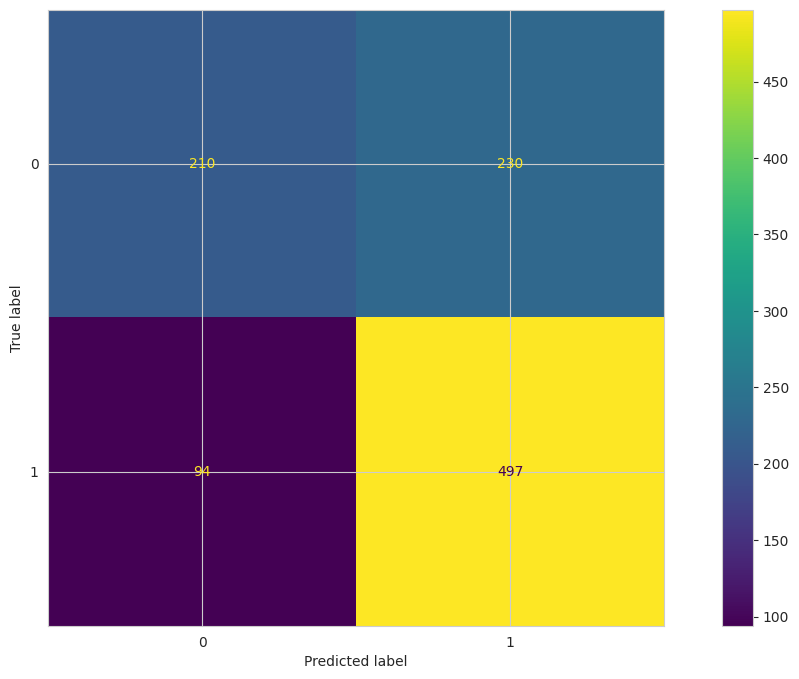

In [176]:
cm = confusion_matrix(Y_train, pred_class_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();

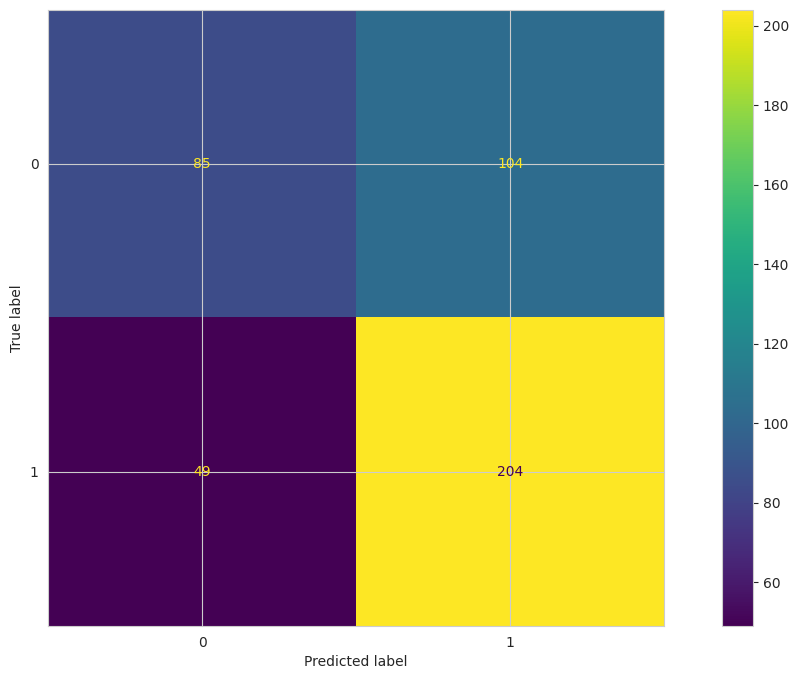

In [177]:
cm = confusion_matrix(Y_test, pred_class_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();

In [178]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.69      0.48      0.56       440
           1       0.68      0.84      0.75       591

    accuracy                           0.69      1031
   macro avg       0.69      0.66      0.66      1031
weighted avg       0.69      0.69      0.67      1031
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.63      0.45      0.53       189
           1       0.66      0.81      0.73       253

    accuracy                           0.65       442
   macro avg       0.65      0.63      0.63       442
weighted avg       0.65      0.65      0.64       442
 



Observations:

Women who did not prefer Contraceptive method ( label : No)

Precision(69%) : 69% of women who did not chosen contraceptive method are trully predicted when compared out of all the women are predicted.

Recall(48%) : out of all women who didnt choose contraceptive method, 48% of women are correctly predicted.

Women who prefer Contraceptive method ( label : Yes)

Precision(66%) : 69% of women who did not chosen contraceptive method are trully predicted when compared out of all the women are predicted.

Recall(81%) : out of all women who didnt choose contraceptive method, 48% of women are correctly predicted.



And overall accuracy is 69% of predictions are correct.

Probability prediction for the training and test data

In [179]:
pred_prob_train = model.predict_proba(X_train)
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.713
AUC for the Test Data: 0.691


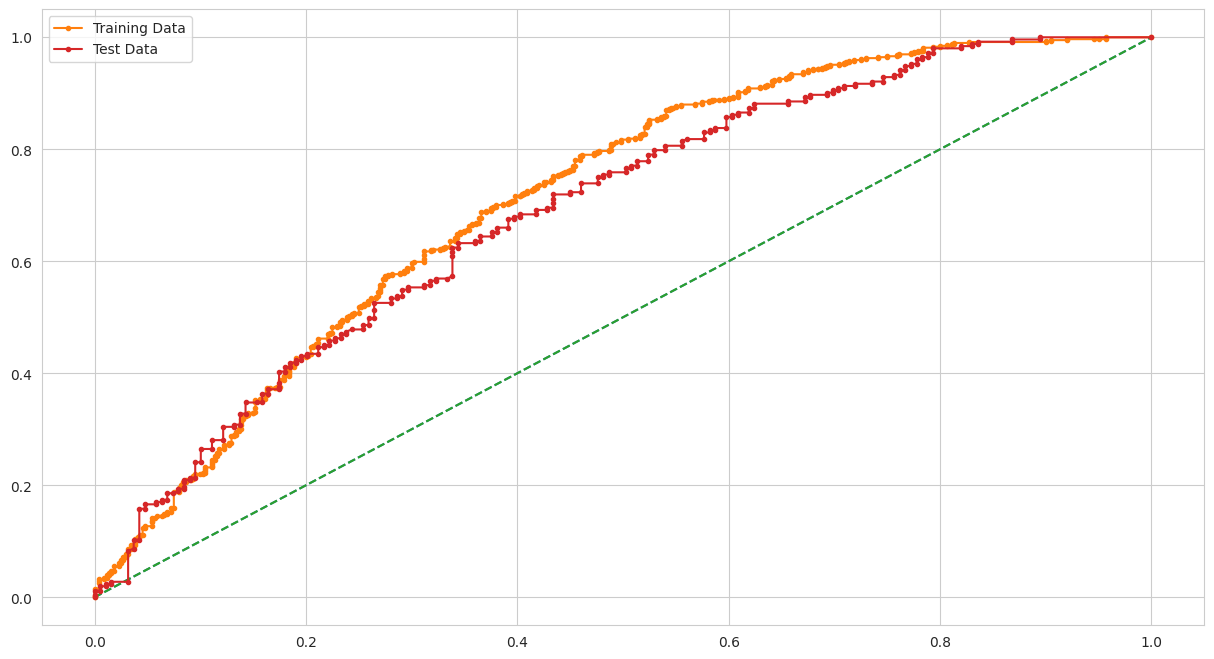

In [180]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Generate Coefficients and intercept for the Linear Discriminant Function

In [181]:
print(clf.intercept_)

[1.703055]


In [182]:
print(clf.coef_)

[[-0.08354942 -0.50901998  0.02905137  0.31443039 -0.40926498 -0.17576431
   0.04111192  0.29241704  0.59424617]]


In [183]:
X.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure '],
      dtype='object')

In [184]:
a=clf.coef_
np.round(a,2) # rounded up coefficients

array([[-0.08, -0.51,  0.03,  0.31, -0.41, -0.18,  0.04,  0.29,  0.59]])

0.59 has the highest magnitude of coefficient that helps in classying the data in other words, Media_exposure is the key factor for women who choose contraceptive methods.
-0.51 is the least magnitude helps in classying the data the least. Whether the Women are educated or not doesnt bothered to choose contraceptive methods.


Using LDA for Dimensionality Reduction

In [185]:
lda_model = LinearDiscriminantAnalysis(n_components = 1)# as only two classes are there for prediction thus 2-1=1 component
X_train_lda = lda_model.fit_transform(X_train, Y_train)
X_test_lda = lda_model.transform(X_test)

In [186]:
print(X_train_lda.shape)
print(X_test_lda.shape)

(1031, 1)
(442, 1)


In [187]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_lda, Y_train)
y_pred = model.predict(X_test_lda)

In [188]:
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,y_pred),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.46      0.53       189
           1       0.67      0.80      0.73       253

    accuracy                           0.66       442
   macro avg       0.65      0.63      0.63       442
weighted avg       0.65      0.66      0.64       442
 



**END of LDA Modelling**

# **CART**

In [189]:
path_excel = "/content/drive/My Drive/Module_5_Predictive_Modelling_Week_5_Project/Contraceptive_method_dataset.xlsx"
dc = pd.read_excel(path_excel)
dc

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No
...,...,...,...,...,...,...,...,...,...,...
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes


In [190]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [191]:
dc.shape

(1473, 10)

In [192]:
dc.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [193]:
Wife_age =dc['Wife_age'].mean()
No_of_child =dc['No_of_children_born'].mean()

In [194]:
dc['Wife_age'].replace(np.nan,Wife_age,inplace = True)
dc['No_of_children_born'].replace(np.nan,No_of_child,inplace = True)

In [195]:
dc.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [196]:
for i in dc.columns:
    if dc[i].dtype == 'object':
        print('\n')
        print('Column:',i)
        print(pd.Categorical(dc[i].unique()))
        print(pd.Categorical(dc[i].unique()).codes)
        dc[i] = pd.Categorical(dc[i]).codes



Column: Wife_ education
['Primary', 'Uneducated', 'Secondary', 'Tertiary']
Categories (4, object): ['Primary', 'Secondary', 'Tertiary', 'Uneducated']
[0 3 1 2]


Column: Husband_education
['Secondary', 'Primary', 'Tertiary', 'Uneducated']
Categories (4, object): ['Primary', 'Secondary', 'Tertiary', 'Uneducated']
[1 0 2 3]


Column: Wife_religion
['Scientology', 'Non-Scientology']
Categories (2, object): ['Non-Scientology', 'Scientology']
[1 0]


Column: Wife_Working
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


Column: Standard_of_living_index
['High', 'Very High', 'Low', 'Very Low']
Categories (4, object): ['High', 'Low', 'Very High', 'Very Low']
[0 2 1 3]


Column: Media_exposure 
['Exposed', 'Not-Exposed']
Categories (2, object): ['Exposed', 'Not-Exposed']
[0 1]


Column: Contraceptive_method_used
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


In [197]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   int8   
 2   Husband_education          1473 non-null   int8   
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   int8   
 5   Wife_Working               1473 non-null   int8   
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   int8   
 8   Media_exposure             1473 non-null   int8   
 9   Contraceptive_method_used  1473 non-null   int8   
dtypes: float64(2), int64(1), int8(7)
memory usage: 44.7 KB


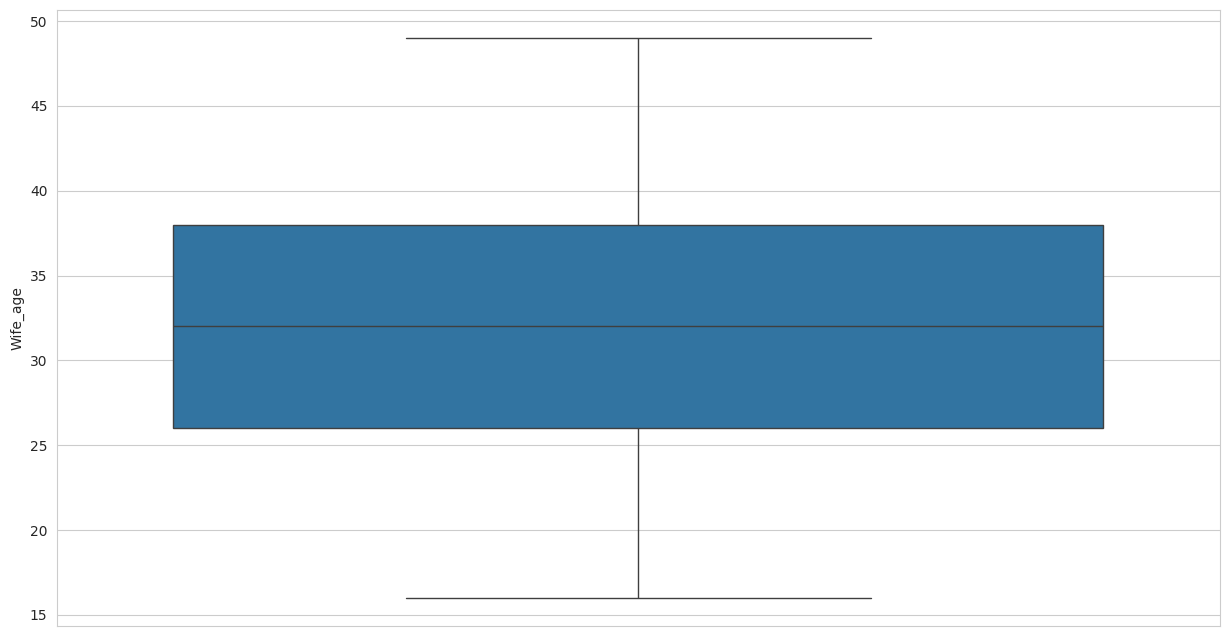

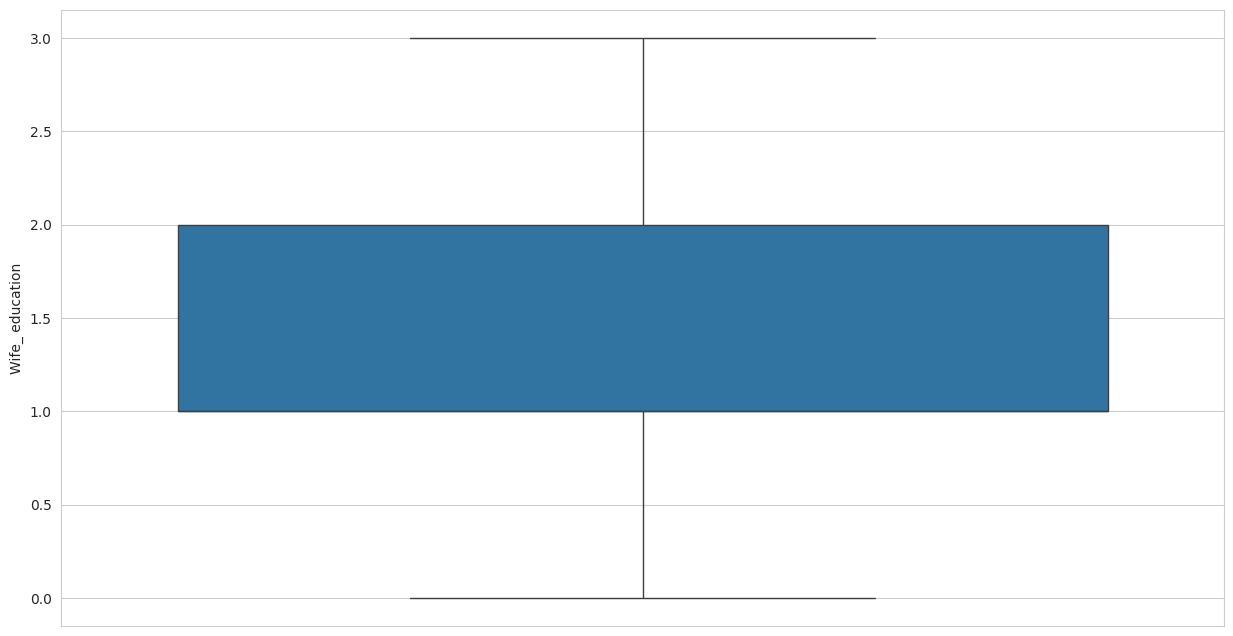

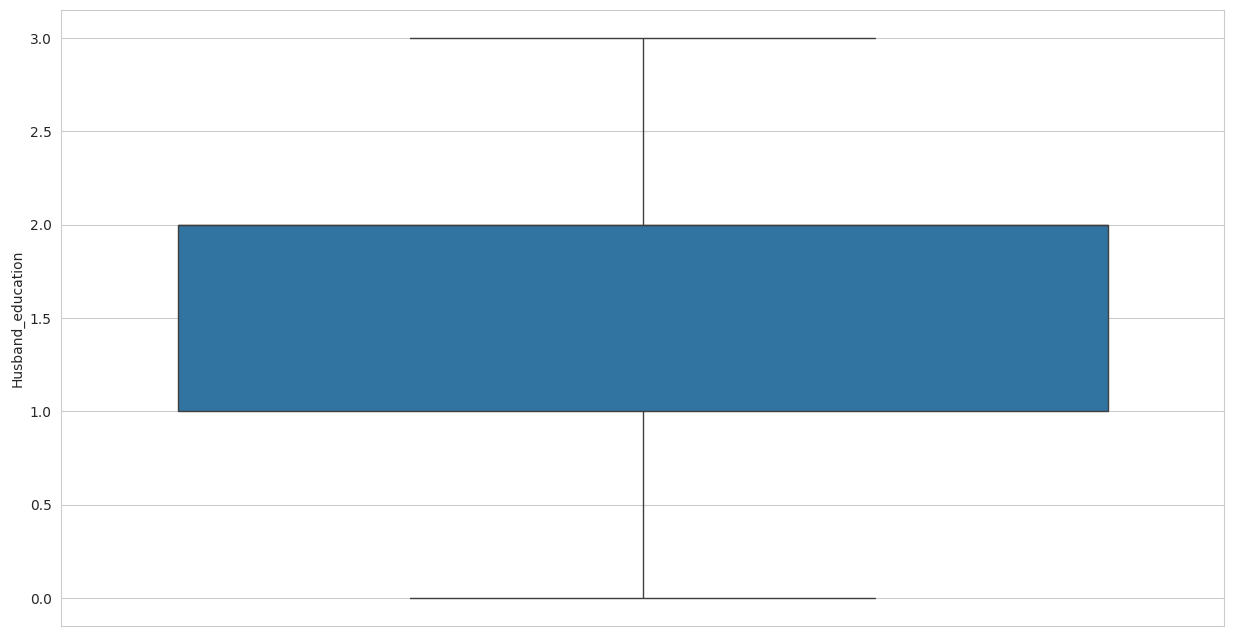

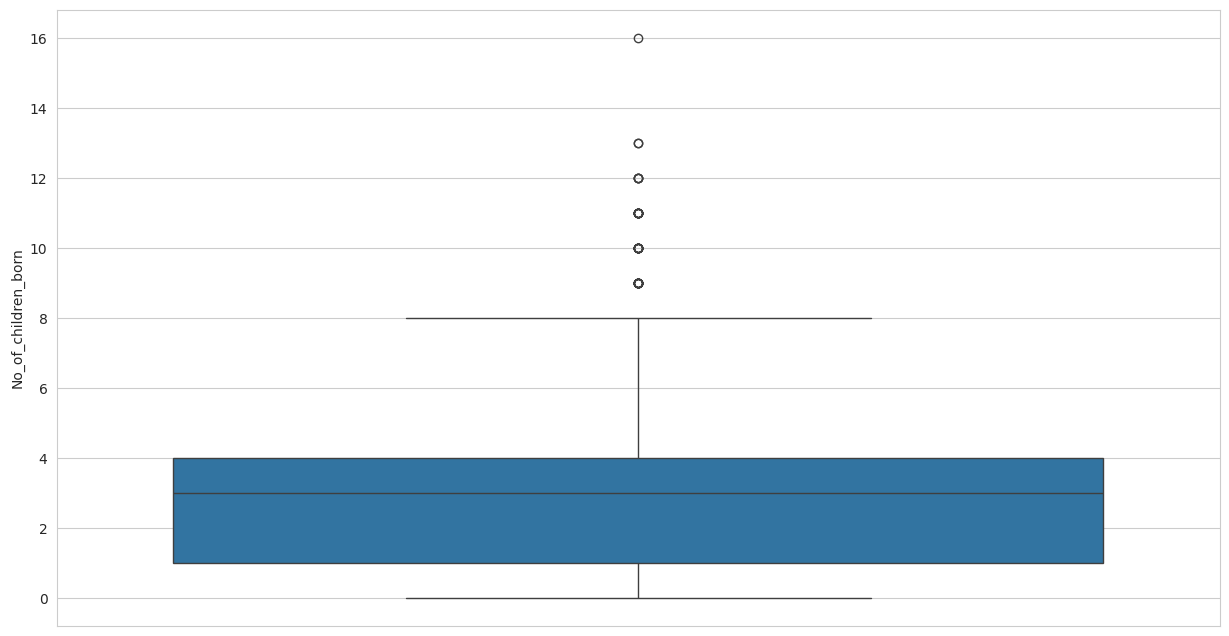

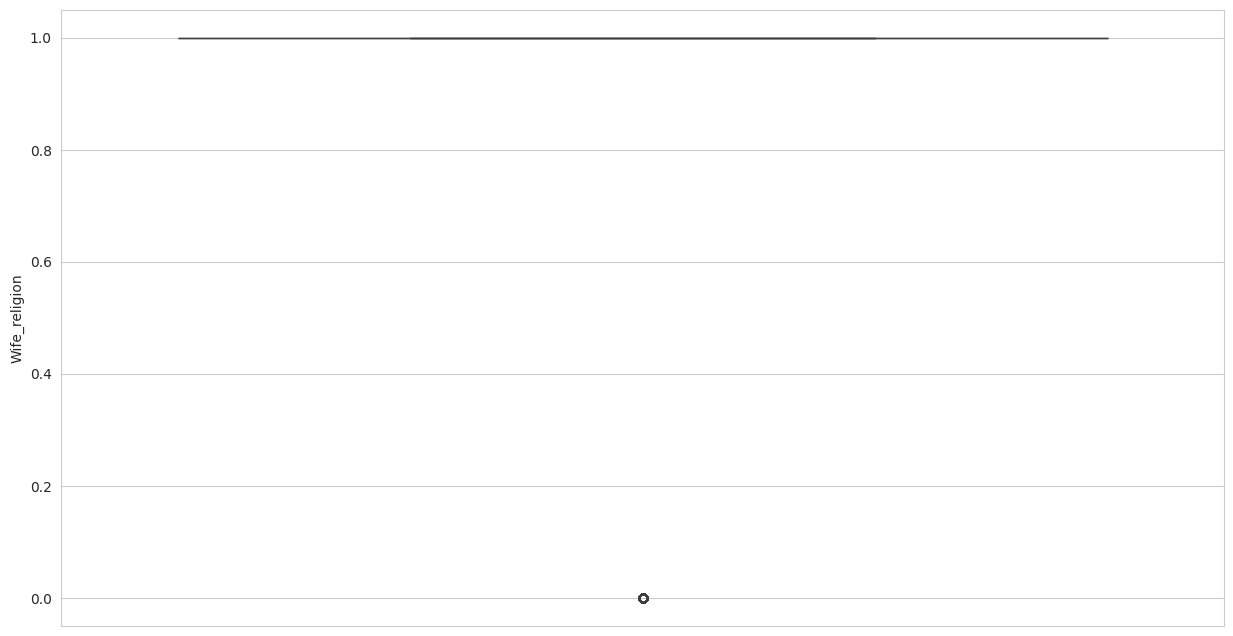

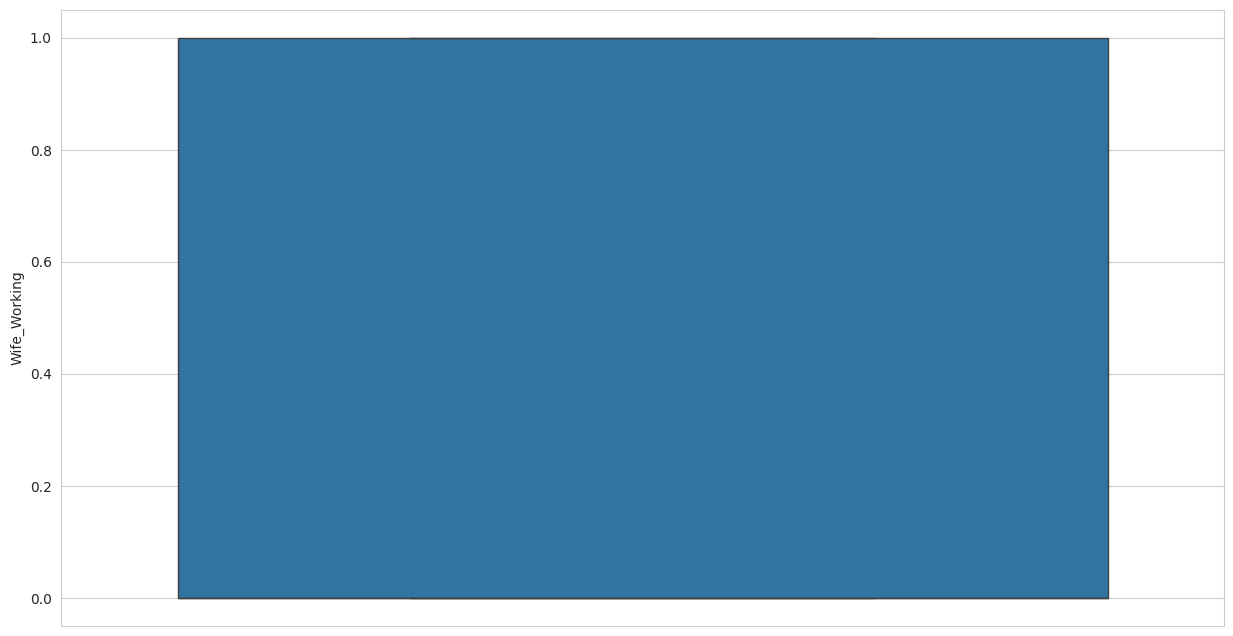

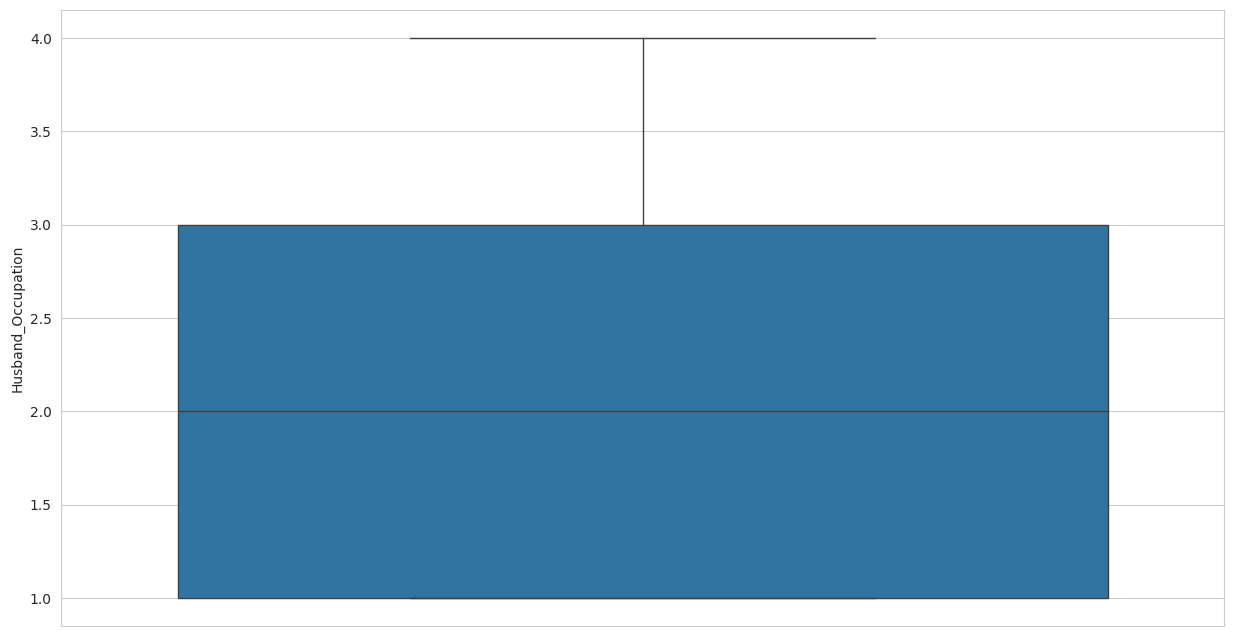

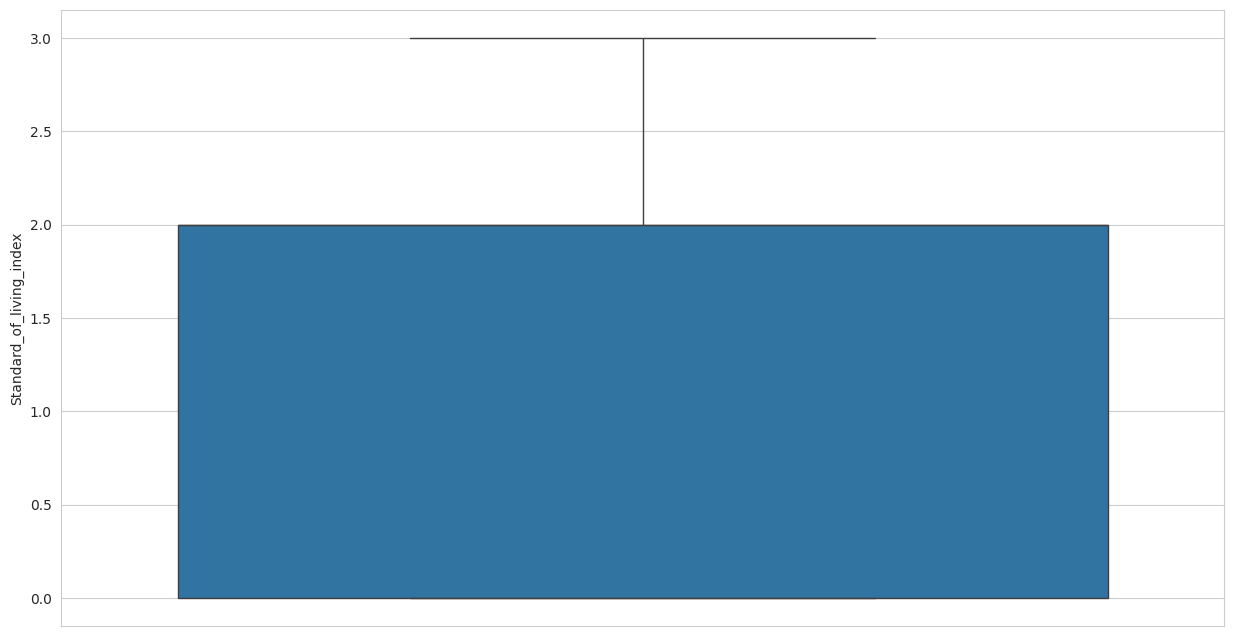

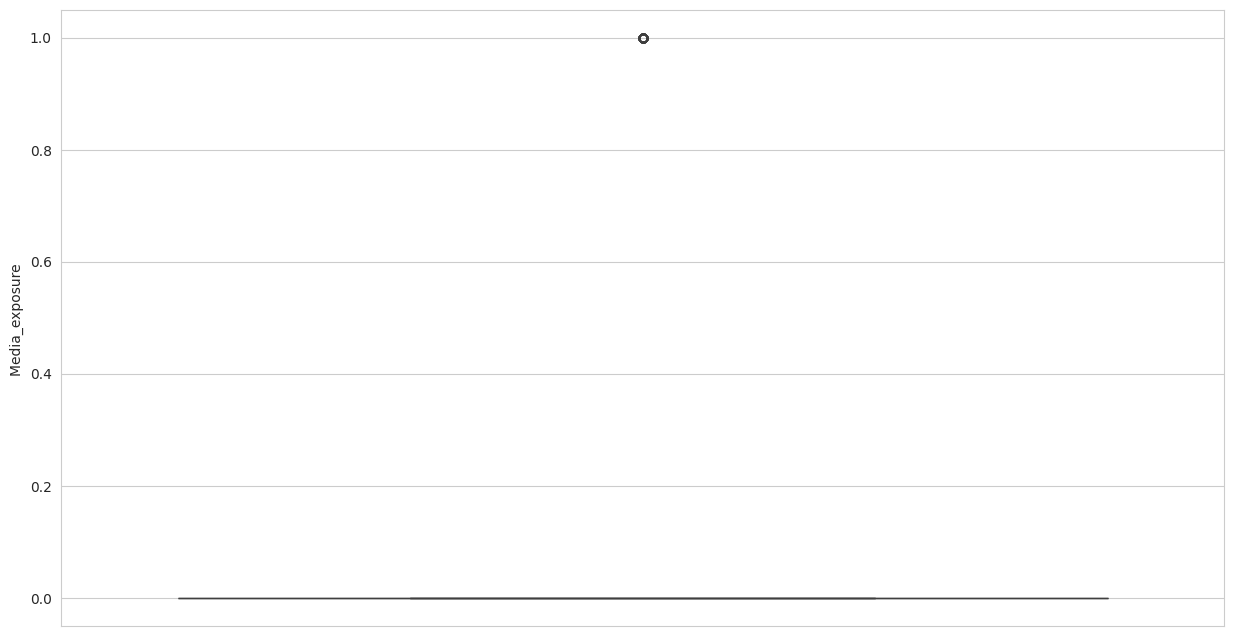

In [348]:
for i in dc:
  #plt.title(dc[i])
  sns.boxplot(dc[i])
  plt.show()
#plt.title('Wife_age')
#sns.boxplot(data = dc, x= 'Wife_age');

In [198]:
dc.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,0,1,3.0,1,0,2,0,0,0
1,45.0,3,1,10.0,1,0,3,2,0,0
2,43.0,0,1,7.0,1,0,3,2,0,0
3,42.0,1,0,9.0,1,0,3,0,0,0
4,36.0,1,1,8.0,1,0,3,1,0,0


Proportion of 1s and 0s (Women who choose Contraceptive method Yes / No)

In [199]:
dc.Contraceptive_method_used.value_counts(normalize=True)

1    0.57298
0    0.42702
Name: Contraceptive_method_used, dtype: float64

Extracting the target column into separate vectors for training set and test set

In [200]:
X = dc.drop("Contraceptive_method_used" , axis=1)
y = dc.pop("Contraceptive_method_used")

Train Test Split

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [202]:
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier(criterion = 'gini' )

In [203]:
dc_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [204]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dc_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

The above code will save a .dot file in your working directory.

WebGraphviz is Graphviz in the Browser.

Copy paste the contents of the file into the link below to get the visualization

http://webgraphviz.com/

In [205]:
print (pd.DataFrame(dc_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
Wife_age                  0.310484
No_of_children_born       0.249728
Wife_ education           0.090234
Standard_of_living_index  0.086558
Husband_Occupation        0.082484
Husband_education         0.074526
Wife_Working              0.065445
Wife_religion             0.032281
Media_exposure            0.008260


Test Data predict

In [206]:
y_predict = dc_model.predict(X_test)

Regularising Data tree

In [207]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,5,10,15,20],
              'min_samples_leaf':[1,5,10,15,20],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, train_labels)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             verbose=True)

In [208]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=20,
                       max_features='auto', random_state=1)

In [209]:
#reg_dc_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 15,min_samples_leaf=10,min_samples_split=30)
#reg_dc_model.fit(X_train, train_labels)

In [210]:
reg_dc_model = DecisionTreeClassifier( ccp_alpha=0.01,criterion='entropy', max_depth=20,max_features='auto',random_state=1)
reg_dc_model.fit(X_train, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=20,
                       max_features='auto', random_state=1)

Generating New Tree

In [211]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree_Regularised.dot','w')
dot_data = tree.export_graphviz(reg_dc_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()
dot_data

In [212]:
print (pd.DataFrame(reg_dc_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
No_of_children_born       0.557872
Wife_age                  0.218415
Wife_ education           0.212225
Husband_education         0.011488
Wife_religion             0.000000
Wife_Working              0.000000
Husband_Occupation        0.000000
Standard_of_living_index  0.000000
Media_exposure            0.000000


In [213]:
ytrain_predict = reg_dc_model.predict(X_train)
ytest_predict = reg_dc_model.predict(X_test)

In [214]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (1031,)
ytest_predict (442,)


Getting the Predicted Classes

In [215]:
ytest_predict

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,

Getting the Predicted Probabilities

In [216]:
ytest_predict_prob=reg_dc_model.predict_proba(X_test)
ytest_predict_prob

array([[0.31707317, 0.68292683],
       [0.98461538, 0.01538462],
       [0.24434389, 0.75565611],
       [0.24434389, 0.75565611],
       [0.98461538, 0.01538462],
       [0.24434389, 0.75565611],
       [0.24434389, 0.75565611],
       [0.52941176, 0.47058824],
       [0.98461538, 0.01538462],
       [0.52941176, 0.47058824],
       [0.24434389, 0.75565611],
       [0.31707317, 0.68292683],
       [0.83333333, 0.16666667],
       [0.31707317, 0.68292683],
       [0.24434389, 0.75565611],
       [0.62820513, 0.37179487],
       [0.31707317, 0.68292683],
       [0.24434389, 0.75565611],
       [0.24434389, 0.75565611],
       [0.24434389, 0.75565611],
       [0.24434389, 0.75565611],
       [0.9       , 0.1       ],
       [0.98461538, 0.01538462],
       [0.31707317, 0.68292683],
       [0.31707317, 0.68292683],
       [0.98461538, 0.01538462],
       [0.24434389, 0.75565611],
       [0.24434389, 0.75565611],
       [0.24434389, 0.75565611],
       [0.24434389, 0.75565611],
       [0.

In [217]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.317073,0.682927
1,0.984615,0.015385
2,0.244344,0.755656
3,0.244344,0.755656
4,0.984615,0.015385


# Model Evaluation

In [218]:
import matplotlib.pyplot as plt

ROC AUC curve for trained data

AUC: 0.738


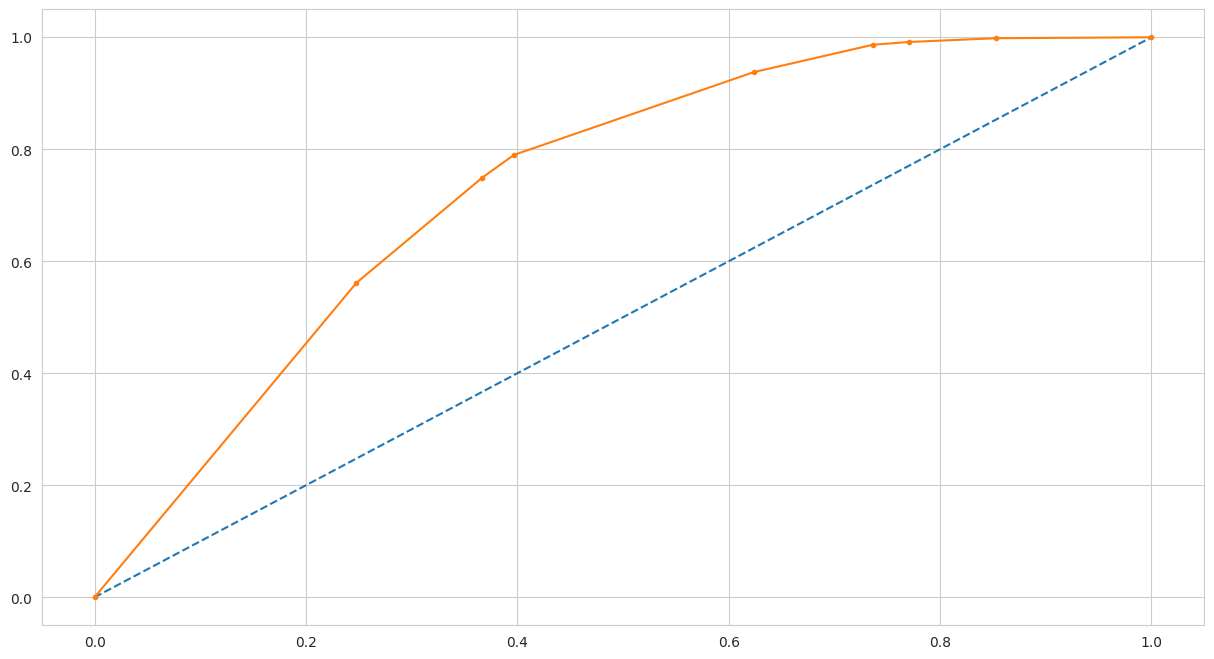

In [219]:
probs = reg_dc_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

ROC AUC curve for Test data

AUC: 0.707


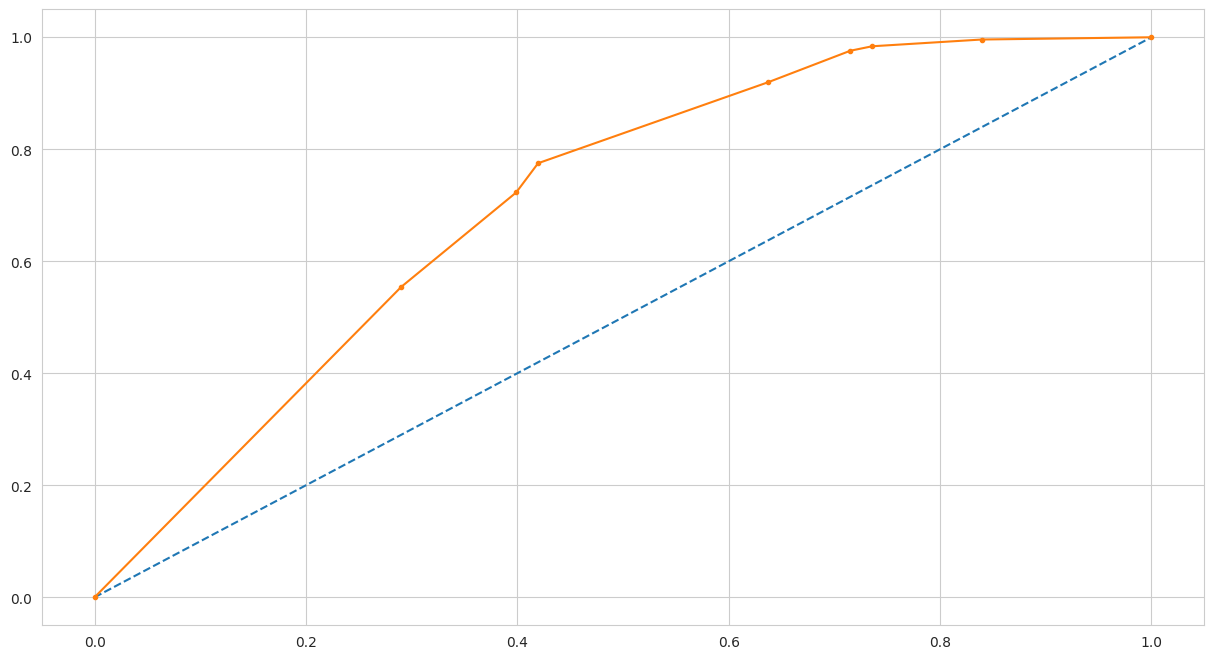

In [220]:
# predict probabilities
probs = reg_dc_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [221]:
from sklearn.metrics import classification_report,confusion_matrix

Confusion matrix for train data

In [222]:
confusion_matrix(train_labels, ytrain_predict)

array([[263, 173],
       [125, 470]])

In [223]:
#Train Data Accuracy
reg_dc_model.score(X_train,train_labels)

0.7109602327837051

In [224]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.68      0.60      0.64       436
           1       0.73      0.79      0.76       595

    accuracy                           0.71      1031
   macro avg       0.70      0.70      0.70      1031
weighted avg       0.71      0.71      0.71      1031



Confusion matrix for test data

In [225]:
confusion_matrix(test_labels, ytest_predict)

array([[112,  81],
       [ 56, 193]])

In [226]:
#Test Data Accuracy
reg_dc_model.score(X_test,test_labels)

0.6900452488687783

In [227]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.67      0.58      0.62       193
           1       0.70      0.78      0.74       249

    accuracy                           0.69       442
   macro avg       0.69      0.68      0.68       442
weighted avg       0.69      0.69      0.69       442



Observations:

Accuracy of trained data : 71%
Accuracy of test data : 69%




**End**